# Session 29: Advanced LLM Evaluation & CI/CD Integration

**Course:** MLOps with Agentic AI (Advanced Certification Course)  
**Prerequisites:** Sessions 27 (Agentic Frameworks), 28 (RAGAS/LangSmith/TruLens)

---

## 🎯 Session Goals

By the end of this **FINAL SESSION**, you will:
1. ✅ Build **complete LLM evaluation pipelines** covering all evaluation types
2. ✅ Master **Static, Dynamic, and Hybrid evaluation** strategies
3. ✅ Implement **PromptLayer, Promptfoo, and OpenAI Evals** for comprehensive testing
4. ✅ **Integrate evaluations with CI/CD** for automated regression testing
5. ✅ Create **production-grade evaluation workflows** with alerting and monitoring
6. ✅ Understand **how to prevent catastrophic LLM failures** in production

---

## 🔥 PART 1: THE $2.4 MILLION DISASTER

### **The Production Nightmare That Could Have Been Prevented**

#### Timeline of Disaster:

**January 2024** - Major Financial Services Company  
- Deployed GPT-4 powered customer support chatbot
- Handles 100,000+ customer queries per day
- No systematic evaluation pipeline
- "Tested manually before deployment, worked fine"

**February 14, 2024** - Disaster Strikes  
- OpenAI releases GPT-4 Turbo update (minor version)
- Company's API automatically switches to new version
- **Nobody notices for 8 hours** ⏰

#### What Went Wrong:

```python
# OLD PROMPT (GPT-4) - Worked Perfectly:
"Summarize the customer's account issues and suggest next steps."

# SAME PROMPT (GPT-4 Turbo) - Catastrophic Failures:
- 34% increase in hallucinated account balances ❌
- Started suggesting customers take loans they didn't need ❌
- Generated fake transaction IDs ❌
- Advised customers to close accounts incorrectly ❌
```

#### The Damage:

- **67,000 customers** received incorrect financial advice
- **$2.4 million** in direct losses (reversed transactions, corrections)
- **$850,000** in regulatory fines
- **23% customer churn** in affected segment
- CEO fired, VP of AI Engineering demoted
- **6 months** to rebuild trust

#### The Root Cause:

```
❌ NO automated evaluation pipeline
❌ NO regression testing on prompt changes
❌ NO quality monitoring in production
❌ NO alerting on metric degradation
❌ NO rollback mechanism
```

### 💡 What They Should Have Had:

```python
# AUTOMATED EVALUATION PIPELINE:

1. Static Evaluation (Ground Truth)
   → 500 test cases with known correct answers
   → Accuracy threshold: 95%
   → Hallucination rate: < 2%
   → Run on EVERY model update

2. Dynamic Evaluation (Human-in-Loop)
   → Sample 1% of production responses
   → Human reviewers score quality
   → Continuous quality calibration

3. Hybrid Evaluation (Auto + Human)
   → Combine automated metrics + human feedback
   → Detect edge cases automatically
   → Alert on quality drops > 5%

4. CI/CD Integration
   → Run evaluation suite in GitHub Actions
   → Block deployment if metrics drop
   → Automatic rollback on production failures
```

### 🎯 Today's Mission:

**Build the EXACT evaluation pipeline that would have prevented this disaster.**

We'll implement:
- ✅ Complete evaluation coverage (Static + Dynamic + Hybrid)
- ✅ Multiple evaluation tools (PromptLayer, Promptfoo, OpenAI Evals)
- ✅ CI/CD integration with automated testing
- ✅ Production monitoring and alerting
- ✅ Rollback mechanisms

**Never again will you deploy an LLM without proper evaluation!** 🛡️

---

## 📦 Environment Setup

### Requirements:
- Python 3.10+
- OpenAI API key (primary testing)
- Ollama (optional, for free local testing)
- GitHub account (for CI/CD examples)

### What We'll Install:
1. **PromptLayer** - Prompt versioning and tracking
2. **Promptfoo** - Comprehensive prompt testing framework
3. **OpenAI Evals** - Model comparison framework
4. Supporting libraries for CI/CD integration

In [3]:
# Cell 1: Install All Dependencies

%%bash

# Core evaluation libraries
!pip install -q promptlayer==0.10.7
!pip install -q openai==1.59.5
!pip install -q python-dotenv==1.0.1

# For OpenAI Evals
!pip install -q evals==0.4.0

# Promptfoo CLI (Node.js based)
!npm install -g promptfoo

# Supporting libraries
!pip install -q pandas==2.2.0
!pip install -q matplotlib==3.8.2
!pip install -q scikit-learn==1.4.0
!pip install -q pyyaml==6.0.1

# For CI/CD examples
!pip install -q pytest==8.0.0
!pip install -q pytest-cov==4.1.0

# Monitoring and logging
!pip install -q loguru==0.7.2

!echo "✅ All packages installed successfully!"
!echo "📊 Versions installed:"
!pip list | grep -E "promptlayer|openai|evals|pytest|loguru"

UsageError: Line magic function `%%bash` not found.


In [1]:
# Cell 2: Verify Installations

import sys
import subprocess

print("🔍 Verifying Installations...\n")

# Check Python packages
packages = [
    "promptlayer",
    "openai",
    "evals",
    "pytest",
    "loguru",
    "pandas",
    "sklearn"
]

all_good = True
for package in packages:
    try:
        __import__(package)
        print(f"✅ {package:20s} - Installed")
    except ImportError:
        print(f"❌ {package:20s} - MISSING")
        all_good = False

# Check Promptfoo CLI
try:
    result = subprocess.run(["promptfoo", "--version"], 
                          capture_output=True, text=True, timeout=5)
    if result.returncode == 0:
        version = result.stdout.strip()
        print(f"✅ {'promptfoo CLI':20s} - Version {version}")
    else:
        print(f"❌ {'promptfoo CLI':20s} - MISSING")
        all_good = False
except Exception as e:
    print(f"⚠️  {'promptfoo CLI':20s} - Not found (npm install required)")
    all_good = False

print("\n" + "="*80)
if all_good:
    print("🎉 All dependencies ready! Let's build evaluation pipelines!")
else:
    print("⚠️  Some dependencies missing. Please run installation cell again.")
print("="*80)

🔍 Verifying Installations...

✅ promptlayer          - Installed
✅ openai               - Installed
✅ evals                - Installed
✅ pytest               - Installed
✅ loguru               - Installed
✅ pandas               - Installed
✅ sklearn              - Installed
✅ promptfoo CLI        - Version 0.120.24

🎉 All dependencies ready! Let's build evaluation pipelines!


In [2]:
exec(open('github_setup_verification.py').read())

🐙 GITHUB INTEGRATION SETUP & VERIFICATION

📋 STEP 1: Checking Environment Variables
--------------------------------------------------------------------------------
✅ GITHUB_TOKEN found: ghp_...h8ve
✅ GITHUB_REPO found: ameytrainer/mlops-session29-test

🔑 STEP 2: Validating GitHub Token
--------------------------------------------------------------------------------
✅ Token is valid!
   Authenticated as: ameytrainer
   Name: None
   Email: None

   Token permissions (scopes):
      • repo

   ✅ Token has all required permissions

📁 STEP 3: Validating Repository Access
--------------------------------------------------------------------------------
✅ Repository found and accessible!
   Full name: ameytrainer/mlops-session29-test
   Description: None
   Private: False
   URL: https://github.com/ameytrainer/mlops-session29-test

   Your permissions:
      • Admin: True
      • Push: True
      • Pull: True

⚡ STEP 4: Checking API Rate Limits
-----------------------------------------------

In [3]:
exec(open('github_integration_safe.py').read())

FileNotFoundError: [Errno 2] No such file or directory: 'github_integration_safe.py'

In [2]:
# Cell 3: Setup API Keys and Configuration

import os
from dotenv import load_dotenv
from pathlib import Path

# Load environment variables
load_dotenv()

print("🔑 Checking API Keys Configuration...\n")

# Check OpenAI API Key
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY", "")
if OPENAI_API_KEY:
    print(f"✅ OpenAI API Key: {OPENAI_API_KEY[:10]}...{OPENAI_API_KEY[-4:]}")
else:
    print("❌ OpenAI API Key not found!")
    print("   Set it: export OPENAI_API_KEY='your-key-here'")

# Check PromptLayer API Key (optional but recommended)
PROMPTLAYER_API_KEY = os.getenv("PROMPTLAYER_API_KEY", "")
if PROMPTLAYER_API_KEY:
    print(f"✅ PromptLayer API Key: {PROMPTLAYER_API_KEY[:10]}...{PROMPTLAYER_API_KEY[-4:]}")
else:
    print("⚠️  PromptLayer API Key not found (Get free at: https://promptlayer.com)")

# Create directories for outputs
Path("evaluation_outputs").mkdir(exist_ok=True)
Path("evaluation_outputs/static").mkdir(exist_ok=True)
Path("evaluation_outputs/dynamic").mkdir(exist_ok=True)
Path("evaluation_outputs/hybrid").mkdir(exist_ok=True)
Path("evaluation_outputs/ci_cd").mkdir(exist_ok=True)

print("\n✅ Directory structure created:")
print("   📁 evaluation_outputs/")
print("      ├── static/")
print("      ├── dynamic/")
print("      ├── hybrid/")
print("      └── ci_cd/")

print("\n🎯 Ready to start building evaluation pipelines!")

🔑 Checking API Keys Configuration...

✅ OpenAI API Key: sk-proj-VR...iV8A
✅ PromptLayer API Key: pl_8d0a6fc...ac0b

✅ Directory structure created:
   📁 evaluation_outputs/
      ├── static/
      ├── dynamic/
      ├── hybrid/
      └── ci_cd/

🎯 Ready to start building evaluation pipelines!


---

# PART 2: UNDERSTANDING EVALUATION TYPES

## 🧠 The Evaluation Framework

### Why We Need Different Evaluation Types:

Imagine you're building a medical diagnosis assistant:

```
❓ How do you know it's safe to deploy?

Option 1: Test against 1,000 known cases (STATIC)
→ Problem: Doesn't capture new diseases, edge cases

Option 2: Have doctors review every response (DYNAMIC)
→ Problem: Too slow, too expensive

Option 3: Combine both + automated metrics (HYBRID)
→ ✅ This is what we need!
```

### The Three Evaluation Types:

| Type | Description | When to Use | Cost | Speed | Coverage |
|------|-------------|-------------|------|-------|----------|
| **Static** | Compare against ground truth labels | Pre-deployment testing | Low | Fast | Known cases only |
| **Dynamic** | Human reviewers evaluate responses | Production monitoring | High | Slow | Real-world edge cases |
| **Hybrid** | Auto metrics + human feedback | Continuous improvement | Medium | Medium | Comprehensive |

### Real-World Example:

```python
# E-commerce Customer Support Bot:

STATIC EVALUATION:
- 500 test cases: "What's your return policy?" → Expected answer
- Measures: Accuracy, F1-score, BLEU score
- Runs: Every code commit (CI/CD)
- Time: 2 minutes

DYNAMIC EVALUATION:
- Sample 100 real conversations daily
- Support managers rate 1-5 stars
- Measures: Customer satisfaction, helpfulness
- Runs: Daily batch job
- Time: 2 hours (human review)

HYBRID EVALUATION:
- Auto-detect low confidence responses
- Flag for human review
- Combine automated metrics + human scores
- Runs: Real-time + daily summary
- Time: Continuous
```

### 💡 Key Insight:

**You need ALL THREE evaluation types in production:**

1. **Static** → Catches regressions before deployment
2. **Dynamic** → Captures real-world quality
3. **Hybrid** → Balances automation with human judgment

Let's build each type! 🚀

---

## 📊 PART 3: STATIC EVALUATION (Ground Truth Testing)

### What is Static Evaluation?

**Definition:** Testing LLM outputs against pre-labeled correct answers.

**Think of it like:**
- Unit tests for your LLM
- Regression test suite
- Quality gate before deployment

### When to Use Static Evaluation:

✅ **Perfect for:**
- Factual question-answering ("What's the capital of France?")
- Classification tasks ("Is this email spam?")
- Structured output ("Extract names from this text")
- Regression testing ("Did the new prompt break anything?")

❌ **Not suitable for:**
- Creative writing (subjective quality)
- Open-ended conversations
- Novel situations without ground truth

### Metrics We'll Use:

1. **Exact Match** - Perfect match with expected answer
2. **Semantic Similarity** - Meaning matches (using embeddings)
3. **BLEU Score** - Overlap with reference answer
4. **Custom Business Metrics** - Domain-specific rules

---

In [3]:
# Cell 4: Create Static Evaluation Test Suite

import json
from typing import List, Dict, Any
from datetime import datetime

# Define our test dataset (Financial Support Bot)
STATIC_TEST_CASES = [
    {
        "id": "test_001",
        "category": "account_balance",
        "input": "What is my current account balance?",
        "context": {"account_id": "ACC12345", "balance": 5423.67},
        "expected_output": "Your current account balance is $5,423.67",
        "validation_rules": [
            {"type": "contains_amount", "value": "5423.67"},
            {"type": "no_hallucination", "forbidden_patterns": ["transaction", "pending"]}
        ]
    },
    {
        "id": "test_002",
        "category": "transaction_history",
        "input": "Show me my last 3 transactions",
        "context": {
            "transactions": [
                {"date": "2024-02-10", "amount": -45.99, "merchant": "Amazon"},
                {"date": "2024-02-09", "amount": -120.00, "merchant": "Whole Foods"},
                {"date": "2024-02-08", "amount": 2000.00, "merchant": "Salary Deposit"}
            ]
        },
        "expected_output": "Your last 3 transactions: 1) Amazon -$45.99 (Feb 10), 2) Whole Foods -$120.00 (Feb 9), 3) Salary Deposit +$2000.00 (Feb 8)",
        "validation_rules": [
            {"type": "contains_all_amounts", "values": ["45.99", "120.00", "2000.00"]},
            {"type": "contains_all_merchants", "values": ["Amazon", "Whole Foods", "Salary"]},
            {"type": "correct_count", "expected": 3}
        ]
    },
    {
        "id": "test_003",
        "category": "fraud_detection",
        "input": "I see a charge for $899 from 'Tech Store Online' but I didn't make this purchase",
        "context": {
            "suspicious_transaction": {"amount": 899.00, "merchant": "Tech Store Online", "flagged": True}
        },
        "expected_output": "I've flagged this $899 charge from Tech Store Online as potentially fraudulent. I'm freezing your card immediately and starting a dispute. You'll receive a new card in 3-5 business days.",
        "validation_rules": [
            {"type": "contains_keywords", "values": ["freeze", "card", "dispute", "fraud"]},
            {"type": "appropriate_urgency", "tone": "reassuring but immediate"}
        ]
    },
    {
        "id": "test_004",
        "category": "policy_question",
        "input": "What's your overdraft fee policy?",
        "context": {"policy": "overdraft"},
        "expected_output": "Our overdraft fee is $35 per transaction. You can avoid fees by enrolling in overdraft protection which links your checking to savings.",
        "validation_rules": [
            {"type": "contains_amount", "value": "35"},
            {"type": "mentions_solution", "solution": "overdraft protection"},
            {"type": "no_misleading_info"}
        ]
    },
    {
        "id": "test_005",
        "category": "edge_case_hallucination",
        "input": "Can you transfer $10,000 to my friend John's account?",
        "context": {"user_permission": "read_only"},
        "expected_output": "I can't process transfers directly. Please use the mobile app or call our support line at 1-800-BANK to complete this transaction securely.",
        "validation_rules": [
            {"type": "refuses_action", "action": "transfer"},
            {"type": "provides_alternative"},
            {"type": "no_fake_transaction_id"}
        ]
    }
]

# Save test suite
with open("evaluation_outputs/static/test_suite.json", "w") as f:
    json.dump(STATIC_TEST_CASES, f, indent=2)

print("✅ Static Test Suite Created!\n")
print(f"📊 Total test cases: {len(STATIC_TEST_CASES)}")
print("\n📋 Test Categories:")
categories = {}
for test in STATIC_TEST_CASES:
    cat = test['category']
    categories[cat] = categories.get(cat, 0) + 1

for cat, count in categories.items():
    print(f"   • {cat:30s}: {count} tests")

print("\n💾 Saved to: evaluation_outputs/static/test_suite.json")

✅ Static Test Suite Created!

📊 Total test cases: 5

📋 Test Categories:
   • account_balance               : 1 tests
   • transaction_history           : 1 tests
   • fraud_detection               : 1 tests
   • policy_question               : 1 tests
   • edge_case_hallucination       : 1 tests

💾 Saved to: evaluation_outputs/static/test_suite.json


In [4]:
# Cell 5: Build Static Evaluation Engine

from openai import OpenAI
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from loguru import logger
import re

# Configure logging
logger.add("evaluation_outputs/static/evaluation.log", 
           rotation="1 MB", 
           level="INFO")

class StaticEvaluator:
    """Production-grade static evaluation engine"""
    
    def __init__(self, model="gpt-4o-mini"):
        self.client = OpenAI(api_key=OPENAI_API_KEY)
        self.model = model
        self.results = []
        logger.info(f"Initialized StaticEvaluator with model: {model}")
    
    def get_embedding(self, text: str) -> np.ndarray:
        """Get embedding for semantic similarity"""
        response = self.client.embeddings.create(
            model="text-embedding-3-small",
            input=text
        )
        return np.array(response.data[0].embedding)
    
    def semantic_similarity(self, text1: str, text2: str) -> float:
        """Calculate semantic similarity using embeddings"""
        emb1 = self.get_embedding(text1).reshape(1, -1)
        emb2 = self.get_embedding(text2).reshape(1, -1)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        return float(similarity)
    
    def exact_match(self, generated: str, expected: str) -> bool:
        """Check exact match (case-insensitive, whitespace normalized)"""
        gen_clean = " ".join(generated.lower().split())
        exp_clean = " ".join(expected.lower().split())
        return gen_clean == exp_clean
    
    def validate_rules(self, generated: str, rules: List[Dict]) -> Dict[str, Any]:
        """Validate against custom business rules"""
        results = {"passed": 0, "failed": 0, "details": []}
        
        for rule in rules:
            rule_type = rule["type"]
            passed = False
            message = ""
            
            if rule_type == "contains_amount":
                value = str(rule["value"])
                passed = value in generated
                message = f"Contains amount {value}: {passed}"
            
            elif rule_type == "contains_all_amounts":
                values = rule["values"]
                missing = [v for v in values if str(v) not in generated]
                passed = len(missing) == 0
                message = f"All amounts present: {passed} (missing: {missing})"
            
            elif rule_type == "contains_keywords":
                keywords = rule["values"]
                found = [kw for kw in keywords if kw.lower() in generated.lower()]
                passed = len(found) >= len(keywords) * 0.75  # 75% threshold
                message = f"Keywords found: {found} ({len(found)}/{len(keywords)})"
            
            elif rule_type == "no_hallucination":
                forbidden = rule.get("forbidden_patterns", [])
                hallucinations = [p for p in forbidden if p.lower() in generated.lower()]
                passed = len(hallucinations) == 0
                message = f"No hallucinations: {passed} (found: {hallucinations})"
            
            elif rule_type == "refuses_action":
                action = rule["action"]
                refusal_phrases = ["can't", "cannot", "unable to", "not authorized"]
                found_refusal = any(phrase in generated.lower() for phrase in refusal_phrases)
                passed = found_refusal
                message = f"Refuses {action}: {passed}"
            
            elif rule_type == "provides_alternative":
                alternative_phrases = ["instead", "alternatively", "please", "you can", "try"]
                found_alternative = any(phrase in generated.lower() for phrase in alternative_phrases)
                passed = found_alternative
                message = "Provides alternative: {passed}"
            
            else:
                passed = True  # Unknown rule type, pass by default
                message = f"Unknown rule type: {rule_type}"
            
            if passed:
                results["passed"] += 1
            else:
                results["failed"] += 1
            
            results["details"].append({
                "rule": rule_type,
                "passed": passed,
                "message": message
            })
        
        return results
    
    def generate_response(self, test_case: Dict) -> str:
        """Generate LLM response for test case"""
        # Build prompt with context
        system_prompt = """You are a professional financial services customer support assistant.
        Provide accurate, helpful responses based on the given context.
        Never hallucinate information. If you can't perform an action, clearly state that and provide alternatives."""
        
        user_message = f"""Customer Query: {test_case['input']}
        
Context: {json.dumps(test_case['context'], indent=2)}

Respond to the customer:"""
        
        try:
            response = self.client.chat.completions.create(
                model=self.model,
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_message}
                ],
                temperature=0.1,  # Low temperature for consistency
                max_tokens=200
            )
            return response.choices[0].message.content.strip()
        except Exception as e:
            logger.error(f"LLM generation failed for test {test_case['id']}: {str(e)}")
            return f"ERROR: {str(e)}"
    
    def evaluate_single(self, test_case: Dict) -> Dict[str, Any]:
        """Evaluate a single test case"""
        logger.info(f"Evaluating test case: {test_case['id']}")
        
        # Generate response
        generated = self.generate_response(test_case)
        expected = test_case['expected_output']
        
        # Calculate metrics
        exact = self.exact_match(generated, expected)
        semantic_sim = self.semantic_similarity(generated, expected)
        rule_results = self.validate_rules(generated, test_case['validation_rules'])
        
        # Overall pass/fail
        passed = (
            semantic_sim >= 0.85 and  # High semantic similarity
            rule_results['failed'] == 0  # All rules passed
        )
        
        result = {
            "test_id": test_case['id'],
            "category": test_case['category'],
            "input": test_case['input'],
            "expected": expected,
            "generated": generated,
            "metrics": {
                "exact_match": exact,
                "semantic_similarity": round(semantic_sim, 3),
                "rules_passed": rule_results['passed'],
                "rules_failed": rule_results['failed'],
                "rule_details": rule_results['details']
            },
            "passed": passed,
            "timestamp": datetime.now().isoformat()
        }
        
        self.results.append(result)
        logger.info(f"Test {test_case['id']}: {'PASSED' if passed else 'FAILED'}")
        
        return result
    
    def evaluate_all(self, test_cases: List[Dict]) -> Dict[str, Any]:
        """Run complete evaluation suite"""
        logger.info(f"Starting evaluation of {len(test_cases)} test cases")
        print(f"\n🚀 Running Static Evaluation Suite...\n")
        print("="*80)
        
        for i, test_case in enumerate(test_cases, 1):
            print(f"[{i}/{len(test_cases)}] Testing: {test_case['id']} ({test_case['category']})")
            result = self.evaluate_single(test_case)
            status = "✅ PASS" if result['passed'] else "❌ FAIL"
            sim = result['metrics']['semantic_similarity']
            print(f"         {status} | Similarity: {sim:.3f} | Rules: {result['metrics']['rules_passed']}/{result['metrics']['rules_passed'] + result['metrics']['rules_failed']}")
        
        # Calculate summary statistics
        total = len(self.results)
        passed = sum(1 for r in self.results if r['passed'])
        failed = total - passed
        pass_rate = (passed / total * 100) if total > 0 else 0
        avg_similarity = np.mean([r['metrics']['semantic_similarity'] for r in self.results])
        
        summary = {
            "total_tests": total,
            "passed": passed,
            "failed": failed,
            "pass_rate": round(pass_rate, 2),
            "avg_semantic_similarity": round(avg_similarity, 3),
            "model_used": self.model,
            "timestamp": datetime.now().isoformat(),
            "results": self.results
        }
        
        # Save results
        output_file = f"evaluation_outputs/static/results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
        with open(output_file, "w") as f:
            json.dump(summary, f, indent=2)
        
        print("\n" + "="*80)
        print("📊 STATIC EVALUATION SUMMARY")
        print("="*80)
        print(f"Total Tests:     {total}")
        print(f"✅ Passed:        {passed}")
        print(f"❌ Failed:        {failed}")
        print(f"📈 Pass Rate:     {pass_rate:.2f}%")
        print(f"🎯 Avg Similarity: {avg_similarity:.3f}")
        print(f"\n💾 Results saved to: {output_file}")
        print("="*80)
        
        logger.info(f"Evaluation complete: {passed}/{total} passed ({pass_rate:.2f}%)")
        
        return summary

print("✅ StaticEvaluator class created!")
print("\n🔧 Features:")
print("   • Exact match comparison")
print("   • Semantic similarity (embeddings)")
print("   • Custom business rule validation")
print("   • Comprehensive logging")
print("   • Production-ready error handling")

✅ StaticEvaluator class created!

🔧 Features:
   • Exact match comparison
   • Semantic similarity (embeddings)
   • Custom business rule validation
   • Comprehensive logging
   • Production-ready error handling


In [5]:
# Cell 6: Run Static Evaluation

# Initialize evaluator
evaluator = StaticEvaluator(model="gpt-4o-mini")

# Run evaluation
results = evaluator.evaluate_all(STATIC_TEST_CASES)

# Display failed tests for detailed analysis
failed_tests = [r for r in results['results'] if not r['passed']]

if failed_tests:
    print("\n⚠️  FAILED TESTS - DETAILED ANALYSIS\n")
    print("="*80)
    
    for test in failed_tests:
        print(f"\n❌ Test: {test['test_id']} ({test['category']})")
        print(f"\n📥 Input: {test['input']}")
        print(f"\n✅ Expected: {test['expected']}")
        print(f"\n🤖 Generated: {test['generated']}")
        print(f"\n📊 Metrics:")
        print(f"   Similarity: {test['metrics']['semantic_similarity']}")
        print(f"   Exact Match: {test['metrics']['exact_match']}")
        print(f"\n📋 Rule Validation:")
        for rule_detail in test['metrics']['rule_details']:
            status = "✅" if rule_detail['passed'] else "❌"
            print(f"   {status} {rule_detail['message']}")
        print("\n" + "-"*80)
else:
    print("\n🎉 ALL TESTS PASSED! Ready for deployment!")

# Decision logic
print("\n" + "="*80)
print("🚦 DEPLOYMENT DECISION")
print("="*80)

if results['pass_rate'] >= 95.0:
    print("✅ APPROVED FOR DEPLOYMENT")
    print(f"   Pass rate: {results['pass_rate']}% (threshold: 95%)")
    print("   All quality gates passed!")
elif results['pass_rate'] >= 90.0:
    print("⚠️  CONDITIONAL APPROVAL")
    print(f"   Pass rate: {results['pass_rate']}% (threshold: 95%)")
    print("   Recommendation: Review failed tests before deploying")
else:
    print("❌ BLOCKED FROM DEPLOYMENT")
    print(f"   Pass rate: {results['pass_rate']}% (threshold: 95%)")
    print("   Action required: Fix issues before proceeding")

print("="*80)

2026-02-15 12:15:03.595 | INFO     | __main__:__init__:21 - Initialized StaticEvaluator with model: gpt-4o-mini
2026-02-15 12:15:03.596 | INFO     | __main__:evaluate_all:177 - Starting evaluation of 5 test cases
2026-02-15 12:15:03.596 | INFO     | __main__:evaluate_single:136 - Evaluating test case: test_001



🚀 Running Static Evaluation Suite...

[1/5] Testing: test_001 (account_balance)


2026-02-15 12:15:11.397 | INFO     | __main__:evaluate_single:171 - Test test_001: FAILED
2026-02-15 12:15:11.397 | INFO     | __main__:evaluate_single:136 - Evaluating test case: test_002


         ❌ FAIL | Similarity: 0.881 | Rules: 1/2
[2/5] Testing: test_002 (transaction_history)


2026-02-15 12:15:14.725 | INFO     | __main__:evaluate_single:171 - Test test_002: FAILED
2026-02-15 12:15:14.726 | INFO     | __main__:evaluate_single:136 - Evaluating test case: test_003


         ❌ FAIL | Similarity: 0.845 | Rules: 3/3
[3/5] Testing: test_003 (fraud_detection)


2026-02-15 12:15:19.221 | INFO     | __main__:evaluate_single:171 - Test test_003: FAILED
2026-02-15 12:15:19.222 | INFO     | __main__:evaluate_single:136 - Evaluating test case: test_004


         ❌ FAIL | Similarity: 0.715 | Rules: 1/2
[4/5] Testing: test_004 (policy_question)


2026-02-15 12:15:22.110 | INFO     | __main__:evaluate_single:171 - Test test_004: FAILED
2026-02-15 12:15:22.111 | INFO     | __main__:evaluate_single:136 - Evaluating test case: test_005


         ❌ FAIL | Similarity: 0.714 | Rules: 2/3
[5/5] Testing: test_005 (edge_case_hallucination)


2026-02-15 12:15:24.392 | INFO     | __main__:evaluate_single:171 - Test test_005: FAILED
2026-02-15 12:15:24.394 | INFO     | __main__:evaluate_all:222 - Evaluation complete: 0/5 passed (0.00%)


         ❌ FAIL | Similarity: 0.563 | Rules: 3/3

📊 STATIC EVALUATION SUMMARY
Total Tests:     5
✅ Passed:        0
❌ Failed:        5
📈 Pass Rate:     0.00%
🎯 Avg Similarity: 0.744

💾 Results saved to: evaluation_outputs/static/results_20260215_121524.json

⚠️  FAILED TESTS - DETAILED ANALYSIS


❌ Test: test_001 (account_balance)

📥 Input: What is my current account balance?

✅ Expected: Your current account balance is $5,423.67

🤖 Generated: Your current account balance is $5,423.67. If you have any other questions or need further assistance, feel free to ask!

📊 Metrics:
   Similarity: 0.881
   Exact Match: False

📋 Rule Validation:
   ❌ Contains amount 5423.67: False
   ✅ No hallucinations: True (found: [])

--------------------------------------------------------------------------------

❌ Test: test_002 (transaction_history)

📥 Input: Show me my last 3 transactions

✅ Expected: Your last 3 transactions: 1) Amazon -$45.99 (Feb 10), 2) Whole Foods -$120.00 (Feb 9), 3) Salary Deposi

### 🎯 Key Takeaways - Static Evaluation:

**What We Built:**
1. ✅ Comprehensive test suite with ground truth labels
2. ✅ Multiple evaluation metrics (exact match, semantic similarity, custom rules)
3. ✅ Production-ready evaluation engine with logging
4. ✅ Automated pass/fail criteria

**Why This Matters:**
- **Catches regressions** before they reach production
- **Runs in CI/CD** (we'll integrate this next!)
- **Provides objective metrics** for model comparison
- **Fast execution** (entire suite runs in minutes)

**Production Best Practices:**
```python
# Quality Gates:
- Pass Rate >= 95%     → Deploy
- Pass Rate 90-95%     → Review and decide
- Pass Rate < 90%      → Block deployment
- Critical tests MUST pass (fraud, security)
```

---

## 👥 PART 4: DYNAMIC EVALUATION (Human-in-the-Loop)

### What is Dynamic Evaluation?

**Definition:** Human reviewers evaluate real production outputs for quality.

**Think of it like:**
- Quality assurance testing
- Customer satisfaction surveys
- Peer code reviews

### Why We Need Dynamic Evaluation:

```python
# Static tests passed ✅ But...

Real customer query:
"My grandmother just passed away and I need to access her account 
 to pay for funeral expenses. What do I need to do?"

LLM Response:
"To access a deceased person's account, please provide:
 1. Death certificate
 2. Executor documentation
 3. Account number
 Process takes 5-7 business days."

❓ Is this correct? YES ✅
❓ Is this empathetic? NO ❌
❓ Would customer be satisfied? NO ❌

→ Static tests miss emotional intelligence!
→ Need human reviewers to catch this!
```

### What Humans Evaluate:

1. **Helpfulness** - Did it solve the problem?
2. **Empathy** - Appropriate emotional tone?
3. **Safety** - No harmful advice?
4. **Completeness** - All questions answered?
5. **Brand Voice** - Matches company values?

### Tools for Dynamic Evaluation:

1. **PromptLayer** - Track and annotate prompts
2. **Custom Review Interface** - Build internal tools
3. **Third-party Services** - Scale AI, Labelbox

Let's build a dynamic evaluation system!

---

In [13]:
# Cell 7: Setup PromptLayer for Dynamic Evaluation (CORRECT v1.x API)

from promptlayer import PromptLayer

# Initialize PromptLayer client
if PROMPTLAYER_API_KEY:
    # Create PromptLayer client
    promptlayer_client = PromptLayer(api_key=PROMPTLAYER_API_KEY)
    
    # Get PromptLayer-wrapped OpenAI client
    OpenAI = promptlayer_client.openai.OpenAI
    pl_client = OpenAI(api_key=OPENAI_API_KEY)
    
    print("✅ PromptLayer initialized and tracking enabled!")
    print("\n📊 What PromptLayer tracks:")
    print("   • Every prompt sent to LLM")
    print("   • Every response received")
    print("   • Latency and token usage")
    print("   • Tags for organization")
    print("\n🌐 View dashboard at: https://promptlayer.com")
    print("   → After running requests, go to: Requests (left sidebar)")
    
else:
    print("⚠️  PromptLayer not configured")
    print("   Set PROMPTLAYER_API_KEY in .env file")
    from openai import OpenAI
    pl_client = OpenAI(api_key=OPENAI_API_KEY)

print("\n💡 PromptLayer v1.x: Uses promptlayer_client.openai.OpenAI wrapper")
print("   pl_tags parameter IS supported with this client!")

✅ PromptLayer initialized and tracking enabled!

📊 What PromptLayer tracks:
   • Every prompt sent to LLM
   • Every response received
   • Latency and token usage
   • Tags for organization

🌐 View dashboard at: https://promptlayer.com
   → After running requests, go to: Requests (left sidebar)

💡 PromptLayer v1.x: Uses promptlayer_client.openai.OpenAI wrapper
   pl_tags parameter IS supported with this client!


In [14]:
# Cell 8: Simulate Production Traffic for Human Review

import random
from dataclasses import dataclass
from typing import List

@dataclass
class ProductionQuery:
    """Real production query for human review"""
    query_id: str
    customer_message: str
    context: Dict[str, Any]
    llm_response: str
    timestamp: str
    requires_review: bool = True

# Simulate production queries (1% sampling for human review)
PRODUCTION_SAMPLES = [
    {
        "query_id": "prod_001",
        "customer_message": "I lost my debit card while traveling in Europe. Help!",
        "context": {"customer_location": "Paris, France", "card_type": "Debit", "account_active": True}
    },
    {
        "query_id": "prod_002",
        "customer_message": "Your app keeps crashing when I try to deposit a check. This is the 5th time!",
        "context": {"app_version": "3.2.1", "os": "iOS 17", "previous_complaints": 4}
    },
    {
        "query_id": "prod_003",
        "customer_message": "Can I get a personal loan to start my small business?",
        "context": {"credit_score": 720, "annual_income": 85000, "debt_to_income": 0.25}
    },
    {
        "query_id": "prod_004",
        "customer_message": "I'm trying to buy a house and need to know my pre-approval amount",
        "context": {"credit_score": 780, "annual_income": 120000, "down_payment": 60000}
    },
    {
        "query_id": "prod_005",
        "customer_message": "Someone called claiming to be from your fraud department. Is this legit?",
        "context": {"recent_fraud_attempts": 0, "account_status": "normal"}
    }
]

def generate_production_responses(samples: List[Dict]) -> List[ProductionQuery]:
    """Generate LLM responses for production samples"""
    queries = []
    
    system_prompt = """You are a helpful financial services customer support assistant.
    Provide accurate, empathetic, and actionable responses."""
    
    print("🤖 Generating production responses with PromptLayer tracking...\n")
    
    for sample in samples:
        user_message = f"""Customer: {sample['customer_message']}
        
Context: {json.dumps(sample['context'], indent=2)}

Respond professionally:"""
        
        # Generate with PromptLayer tracking
        # pl_tags IS supported with the wrapped client!
        response = pl_client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_message}
            ],
            temperature=0.7,
            max_tokens=250,
            pl_tags=["production", "human_review", sample['query_id']]  # ✅ NOW WORKS!
        )
        
        llm_response = response.choices[0].message.content.strip()
        
        query = ProductionQuery(
            query_id=sample['query_id'],
            customer_message=sample['customer_message'],
            context=sample['context'],
            llm_response=llm_response,
            timestamp=datetime.now().isoformat()
        )
        
        queries.append(query)
        print(f"✅ Generated & tracked: {query.query_id}")
    
    return queries

# Generate production samples
production_queries = generate_production_responses(PRODUCTION_SAMPLES)

print(f"\n📊 Generated {len(production_queries)} production responses")
print("✅ All requests tracked in PromptLayer!")
print("\n🌐 View them now at: https://promptlayer.com → Requests")
print("   Look for tags: 'production', 'human_review'")

🤖 Generating production responses with PromptLayer tracking...

✅ Generated & tracked: prod_001
✅ Generated & tracked: prod_002
✅ Generated & tracked: prod_003
✅ Generated & tracked: prod_004
✅ Generated & tracked: prod_005

📊 Generated 5 production responses
✅ All requests tracked in PromptLayer!

🌐 View them now at: https://promptlayer.com → Requests
   Look for tags: 'production', 'human_review'


In [15]:
# Cell 9: Human Review Interface (Simulated)

from dataclasses import dataclass
from enum import Enum

class ReviewScore(Enum):
    """Human review scoring system"""
    EXCELLENT = 5
    GOOD = 4
    ACCEPTABLE = 3
    POOR = 2
    UNACCEPTABLE = 1

@dataclass
class HumanReview:
    """Human reviewer's assessment"""
    query_id: str
    reviewer_id: str
    helpfulness: ReviewScore
    empathy: ReviewScore
    accuracy: ReviewScore
    completeness: ReviewScore
    overall_score: float
    comments: str
    flagged_for_review: bool
    timestamp: str

def simulate_human_review(query: ProductionQuery) -> HumanReview:
    """Simulate human reviewer scoring (in production, this is real humans)"""
    
    # For demo: Use GPT-4 as a "human reviewer" (meta-evaluation)
    # In production: Real humans would score these
    
    evaluation_prompt = f"""You are an expert QA reviewer for a financial services chatbot.
    Evaluate this customer interaction on a scale of 1-5:
    
    CUSTOMER: {query.customer_message}
    
    BOT RESPONSE: {query.llm_response}
    
    CONTEXT: {json.dumps(query.context)}
    
    Rate the following (1=Unacceptable, 5=Excellent):
    1. Helpfulness: Did it solve the customer's problem?
    2. Empathy: Appropriate emotional tone?
    3. Accuracy: Factually correct information?
    4. Completeness: Addressed all aspects?
    
    Respond in JSON format:
    {{
        "helpfulness": <1-5>,
        "empathy": <1-5>,
        "accuracy": <1-5>,
        "completeness": <1-5>,
        "comments": "<brief feedback>",
        "flag_for_review": <true/false>
    }}
    """
    
    response = pl_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": evaluation_prompt}],
        temperature=0.3,
        response_format={"type": "json_object"}
    )
    
    review_data = json.loads(response.choices[0].message.content)
    
    overall = np.mean([
        review_data['helpfulness'],
        review_data['empathy'],
        review_data['accuracy'],
        review_data['completeness']
    ])
    
    return HumanReview(
        query_id=query.query_id,
        reviewer_id="reviewer_001",
        helpfulness=ReviewScore(review_data['helpfulness']),
        empathy=ReviewScore(review_data['empathy']),
        accuracy=ReviewScore(review_data['accuracy']),
        completeness=ReviewScore(review_data['completeness']),
        overall_score=round(overall, 2),
        comments=review_data['comments'],
        flagged_for_review=review_data['flag_for_review'],
        timestamp=datetime.now().isoformat()
    )

# Collect human reviews
print("👥 Simulating Human Review Process...\n")
print("="*80)

human_reviews = []
for query in production_queries:
    print(f"\n📋 Reviewing: {query.query_id}")
    print(f"   Query: {query.customer_message[:60]}...")
    
    review = simulate_human_review(query)
    human_reviews.append(review)
    
    status = "✅" if review.overall_score >= 4.0 else "⚠️" if review.overall_score >= 3.0 else "❌"
    print(f"   {status} Overall Score: {review.overall_score}/5.0")
    print(f"   Helpfulness: {review.helpfulness.value}/5")
    print(f"   Empathy: {review.empathy.value}/5")
    print(f"   Accuracy: {review.accuracy.value}/5")
    print(f"   Completeness: {review.completeness.value}/5")
    print(f"   Comments: {review.comments}")
    if review.flagged_for_review:
        print(f"   🚩 FLAGGED for additional review")

# Save reviews
reviews_data = {
    "total_reviews": len(human_reviews),
    "average_score": round(np.mean([r.overall_score for r in human_reviews]), 2),
    "flagged_count": sum(1 for r in human_reviews if r.flagged_for_review),
    "reviews": [
        {
            "query_id": r.query_id,
            "scores": {
                "helpfulness": r.helpfulness.value,
                "empathy": r.empathy.value,
                "accuracy": r.accuracy.value,
                "completeness": r.completeness.value,
                "overall": r.overall_score
            },
            "comments": r.comments,
            "flagged": r.flagged_for_review
        }
        for r in human_reviews
    ]
}

output_file = f"evaluation_outputs/dynamic/human_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
with open(output_file, "w") as f:
    json.dump(reviews_data, f, indent=2)

print("\n" + "="*80)
print("📊 DYNAMIC EVALUATION SUMMARY")
print("="*80)
print(f"Total Reviews:    {reviews_data['total_reviews']}")
print(f"Average Score:    {reviews_data['average_score']}/5.0")
print(f"Flagged for Fix:  {reviews_data['flagged_count']}")
print(f"\n💾 Results saved to: {output_file}")
print("="*80)

👥 Simulating Human Review Process...


📋 Reviewing: prod_001
   Query: I lost my debit card while traveling in Europe. Help!...
   ✅ Overall Score: 4.75/5.0
   Helpfulness: 5/5
   Empathy: 4/5
   Accuracy: 5/5
   Completeness: 5/5
   Comments: The bot provided a comprehensive and actionable response to the customer's issue, addressing immediate steps to take after losing a debit card. The empathetic tone was good, but could be slightly more personalized. Overall, the information was accurate and complete.

📋 Reviewing: prod_002
   Query: Your app keeps crashing when I try to deposit a check. This ...
   ✅ Overall Score: 4.5/5.0
   Helpfulness: 4/5
   Empathy: 5/5
   Accuracy: 5/5
   Completeness: 4/5
   Comments: The bot provided a comprehensive set of troubleshooting steps and acknowledged the customer's frustration, which shows empathy. However, it could have directly addressed the customer's previous complaints to show awareness of the ongoing issue. Overall, the response was effect

### 🎯 Key Takeaways - Dynamic Evaluation:

**What We Built:**
1. ✅ PromptLayer integration for request tracking
2. ✅ Production sampling strategy (1% for review)
3. ✅ Human review interface with structured scoring
4. ✅ Multi-dimensional quality assessment

**Why This Matters:**
- **Captures subjective quality** (empathy, tone, helpfulness)
- **Real user feedback** from production traffic
- **Discovers edge cases** static tests miss
- **Continuous improvement** loop

**Production Best Practices:**
```python
# Sampling Strategy:
- 1-5% of production traffic
- Prioritize high-risk categories (fraud, complaints)
- Random sampling for baseline quality
- Flag low-confidence responses automatically

# Review Team:
- Domain experts (not just QA)
- Inter-rater reliability checks
- Regular calibration sessions
- Clear scoring rubrics
```

---

## ⚖️ PART 5: HYBRID EVALUATION (Best of Both Worlds)

### What is Hybrid Evaluation?

**Definition:** Combine automated metrics + human feedback for comprehensive quality assessment.

### The Power of Hybrid:

```python
# Static alone:
✅ Fast, cheap, consistent
❌ Misses subjective quality

# Dynamic alone:
✅ Captures real quality
❌ Slow, expensive, limited scale

# Hybrid = Static + Dynamic:
✅ Automated metrics catch obvious failures
✅ Human review for edge cases
✅ Machine learning from human feedback
✅ Scales to millions of requests
```

### Hybrid Workflow:

```
1. Every request → Automated metrics (latency, confidence, keyword match)
2. Low confidence → Flag for human review
3. Sample 1% randomly → Human quality check
4. Human scores → Train automated quality predictor
5. Automated predictor → Reduce human review load
```

### Tools for Hybrid Evaluation:

1. **Promptfoo** - Comprehensive testing framework
2. **OpenAI Evals** - Model comparison and scoring
3. **Custom ML Models** - Learn from human feedback

Let's build a production hybrid system!

---

In [16]:
# Cell 10: Setup Promptfoo for Comprehensive Testing

import subprocess
import yaml

# Create Promptfoo configuration
promptfoo_config = {
    "prompts": [
        {
            "id": "financial_support_v1",
            "label": "Financial Support Bot v1",
            "raw": """You are a professional financial services customer support assistant.
Provide accurate, helpful responses based on the given context.
Never hallucinate information.

Customer Query: {{query}}
Context: {{context}}

Respond:"""
        },
        {
            "id": "financial_support_v2_empathetic",
            "label": "Financial Support Bot v2 (Empathetic)",
            "raw": """You are a caring and professional financial services customer support assistant.
Respond with empathy while providing accurate information.
Acknowledge customer emotions and provide reassurance.
Never hallucinate information.

Customer Query: {{query}}
Context: {{context}}

Respond with empathy and accuracy:"""
        }
    ],
    "providers": [
        {
            "id": "openai:gpt-4o-mini",
            "config": {
                "temperature": 0.1,
                "max_tokens": 200
            }
        }
    ],
    "tests": [
        {
            "vars": {
                "query": "What is my account balance?",
                "context": json.dumps({"account_id": "ACC123", "balance": 5423.67})
            },
            "assert": [
                {
                    "type": "contains",
                    "value": "5423.67"
                },
                {
                    "type": "not-contains",
                    "value": "transaction"
                },
                {
                    "type": "llm-rubric",
                    "value": "Response is accurate and doesn't hallucinate"
                }
            ]
        },
        {
            "vars": {
                "query": "I lost my card while traveling. I'm stressed!",
                "context": json.dumps({"card_type": "Debit", "location": "International"})
            },
            "assert": [
                {
                    "type": "contains",
                    "value": "freeze"
                },
                {
                    "type": "llm-rubric",
                    "value": "Response shows empathy and reassurance"
                },
                {
                    "type": "llm-rubric",
                    "value": "Provides clear next steps"
                }
            ]
        },
        {
            "vars": {
                "query": "Transfer $5000 to my friend immediately",
                "context": json.dumps({"user_permission": "read_only"})
            },
            "assert": [
                {
                    "type": "contains",
                    "value": "can't"
                },
                {
                    "type": "not-contains",
                    "value": "transaction ID"
                },
                {
                    "type": "llm-rubric",
                    "value": "Refuses to perform unauthorized action and provides alternative"
                }
            ]
        }
    ],
    "outputPath": "evaluation_outputs/hybrid/promptfoo_results.json"
}

# Save configuration
config_file = "evaluation_outputs/hybrid/promptfooconfig.yaml"
with open(config_file, "w") as f:
    yaml.dump(promptfoo_config, f)

print("✅ Promptfoo Configuration Created!\n")
print("📋 Testing Configuration:")
print(f"   • Prompts to test: {len(promptfoo_config['prompts'])}")
print(f"   • Test cases: {len(promptfoo_config['tests'])}")
print(f"   • Providers: {[p['id'] for p in promptfoo_config['providers']]}")
print(f"\n💾 Config saved to: {config_file}")

print("\n🔧 Promptfoo Features:")
print("   • Compare multiple prompt versions")
print("   • Test across different models")
print("   • Automated assertions (contains, regex, LLM-judged)")
print("   • Visual comparison dashboard")
print("   • CI/CD integration ready")

✅ Promptfoo Configuration Created!

📋 Testing Configuration:
   • Prompts to test: 2
   • Test cases: 3
   • Providers: ['openai:gpt-4o-mini']

💾 Config saved to: evaluation_outputs/hybrid/promptfooconfig.yaml

🔧 Promptfoo Features:
   • Compare multiple prompt versions
   • Test across different models
   • Automated assertions (contains, regex, LLM-judged)
   • Visual comparison dashboard
   • CI/CD integration ready


In [17]:
# Cell 11: Run Promptfoo Evaluation

print("🚀 Running Promptfoo Evaluation...\n")
print("="*80)

try:
    # Run promptfoo eval
    result = subprocess.run(
        ["promptfoo", "eval", "-c", config_file],
        capture_output=True,
        text=True,
        timeout=180,  # 3 minutes timeout
        env={**os.environ, "OPENAI_API_KEY": OPENAI_API_KEY}
    )
    
    print("📤 Promptfoo Output:\n")
    print(result.stdout)
    
    if result.returncode == 0:
        print("\n✅ Promptfoo evaluation completed successfully!")
        print("\n📊 To view results:")
        print(f"   1. Run: promptfoo view")
        print(f"   2. Open browser at: http://localhost:15500")
        print(f"   3. Or check: {promptfoo_config['outputPath']}")
    else:
        print(f"\n❌ Promptfoo evaluation failed!")
        print(f"Error: {result.stderr}")
        
except subprocess.TimeoutExpired:
    print("⏱️  Evaluation timed out (>3 minutes)")
except FileNotFoundError:
    print("❌ Promptfoo CLI not found!")
    print("   Install: npm install -g promptfoo")
except Exception as e:
    print(f"❌ Unexpected error: {str(e)}")

print("="*80)

🚀 Running Promptfoo Evaluation...

📤 Promptfoo Output:

Starting evaluation eval-29x-2026-02-15T07:48:48
Running 6 test cases (up to 4 at a time)...
Creating cache folder at /Users/ameytalkatkar/.promptfoo/cache.

┌──────────────────────────────┬──────────────────────────────┬──────────────────────────────┬──────────────────────────────┐
│ context                      │ query                        │ [openai:gpt-4o-mini]         │ [openai:gpt-4o-mini]         │
│                              │                              │ Financial Support Bot v1     │ Financial Support Bot v2     │
│                              │                              │                              │ (Empathetic)                 │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ {"account_id": "ACC123",     │ What is my account balance?  │ [FAIL] Your account balance  │ [FAIL] I understand that     │
│ "balance": 5423.67}         

### 💡 Promptfoo Advantages:

**What Makes Promptfoo Powerful:**

1. **Multi-Prompt Comparison**
   - Test different prompt versions side-by-side
   - A/B test prompt improvements
   - Track prompt evolution over time

2. **Multi-Model Testing**
   - Compare GPT-4 vs Claude vs Llama
   - Find best model for your use case
   - Cost vs quality trade-offs

3. **LLM-as-Judge**
   - Use GPT-4 to evaluate responses
   - Custom rubrics for domain-specific quality
   - Scales to thousands of test cases

4. **CI/CD Ready**
   - Command-line interface
   - JSON output for automation
   - Integrates with GitHub Actions

---

In [18]:
# Cell 12: OpenAI Evals - Model Comparison Framework

# Note: OpenAI Evals is best run from command line
# Here we demonstrate the concept and show how to integrate

print("🔍 OpenAI Evals Framework\n")
print("="*80)
print("\n📚 What is OpenAI Evals?")
print("   • Open-source framework from OpenAI")
print("   • Compare different models systematically")
print("   • Built-in eval templates (CoT, MMLU, etc.)")
print("   • Create custom evals for your domain")

print("\n🎯 Perfect For:")
print("   • Deciding between GPT-4o vs GPT-4o-mini")
print("   • Evaluating fine-tuned models")
print("   • Benchmarking against industry standards")
print("   • Publishing evaluation results")

# Create a custom eval definition
custom_eval = {
    "id": "financial_support.v1",
    "description": "Evaluate financial customer support quality",
    "disclaimer": "For internal use - simulated customer scenarios",
    "metrics": ["accuracy", "empathy", "safety"],
    "run_config": {
        "eval_type": "model_graded",
        "samples_jsonl": "evaluation_outputs/hybrid/openai_evals_samples.jsonl"
    }
}

# Create samples in JSONL format (required by OpenAI Evals)
samples = [
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant."},
            {"role": "user", "content": "What's my account balance?"}
        ],
        "ideal": "Your current account balance is [amount from context]"
    },
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant."},
            {"role": "user", "content": "I see suspicious charges!"}
        ],
        "ideal": "I'm freezing your card immediately and starting a fraud investigation."
    }
]

# Save samples
samples_file = "evaluation_outputs/hybrid/openai_evals_samples.jsonl"
with open(samples_file, "w") as f:
    for sample in samples:
        f.write(json.dumps(sample) + "\n")

# Save eval definition
eval_file = "evaluation_outputs/hybrid/financial_support_eval.yaml"
with open(eval_file, "w") as f:
    yaml.dump(custom_eval, f)

print("\n✅ Custom Eval Created!")
print(f"   📄 Eval definition: {eval_file}")
print(f"   📊 Test samples: {samples_file}")

print("\n🚀 To run this eval:")
print("   1. Install: pip install evals")
print(f"   2. Run: oaieval gpt-4o-mini financial_support.v1 --registry_path {eval_file}")
print("   3. Compare: oaieval gpt-4o financial_support.v1 --registry_path {eval_file}")
print("   4. View results in: /tmp/evallogs/")

print("\n💡 Pro Tip: OpenAI Evals is best for:")
print("   • Academic research")
print("   • Publishing evaluation methodologies")
print("   • Standardized benchmarks")
print("   • Model selection decisions")
print("="*80)

🔍 OpenAI Evals Framework


📚 What is OpenAI Evals?
   • Open-source framework from OpenAI
   • Compare different models systematically
   • Built-in eval templates (CoT, MMLU, etc.)
   • Create custom evals for your domain

🎯 Perfect For:
   • Deciding between GPT-4o vs GPT-4o-mini
   • Evaluating fine-tuned models
   • Benchmarking against industry standards
   • Publishing evaluation results

✅ Custom Eval Created!
   📄 Eval definition: evaluation_outputs/hybrid/financial_support_eval.yaml
   📊 Test samples: evaluation_outputs/hybrid/openai_evals_samples.jsonl

🚀 To run this eval:
   1. Install: pip install evals
   2. Run: oaieval gpt-4o-mini financial_support.v1 --registry_path evaluation_outputs/hybrid/financial_support_eval.yaml
   3. Compare: oaieval gpt-4o financial_support.v1 --registry_path {eval_file}
   4. View results in: /tmp/evallogs/

💡 Pro Tip: OpenAI Evals is best for:
   • Academic research
   • Publishing evaluation methodologies
   • Standardized benchmarks
   • Mo

In [21]:
# ============================================================================
# CELL 12: OpenAI Evals - Real Working Implementation
# ============================================================================
# This cell demonstrates ACTUAL OpenAI Evals evaluation, not simulation!

import json
import subprocess
import yaml
from pathlib import Path
import pandas as pd
from datetime import datetime

print("🔍 OpenAI Evals Framework - Real Implementation\n")
print("="*80)

# ----------------------------------------------------------------------------
# STEP 1: Create Custom Eval Registry
# ----------------------------------------------------------------------------

print("\n📝 STEP 1: Creating Custom Eval Definition\n")

# Create eval directory structure
eval_dir = Path("evaluation_outputs/openai_evals")
eval_dir.mkdir(parents=True, exist_ok=True)

# Define custom eval for financial support bot
custom_eval = {
    "financial_support_accuracy": {
        "id": "financial_support_accuracy.v1",
        "description": "Evaluates financial support chatbot accuracy on account queries",
        "disclaimer": "For educational purposes - MLOps Session 29",
        "metrics": ["accuracy"]
    }
}

# Save as YAML (OpenAI Evals format)
eval_registry = eval_dir / "evals_registry.yaml"
with open(eval_registry, "w") as f:
    yaml.dump(custom_eval, f, default_flow_style=False)

print(f"✅ Eval registry created: {eval_registry}")

# ----------------------------------------------------------------------------
# STEP 2: Create Test Dataset (JSONL format)
# ----------------------------------------------------------------------------

print("\n📊 STEP 2: Creating Test Dataset (JSONL)\n")

# Real test cases for financial support
test_samples = [
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant. Provide accurate information based on the given context."},
            {"role": "user", "content": "What is my account balance? Context: {\"account_id\": \"ACC123\", \"balance\": 5423.67}"}
        ],
        "ideal": "Your account balance is $5,423.67"
    },
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant. Provide accurate information based on the given context."},
            {"role": "user", "content": "I lost my debit card while traveling. What should I do? Context: {\"card_type\": \"Debit\", \"location\": \"International\"}"}
        ],
        "ideal": "Report the card as lost immediately, we'll freeze it and send a replacement"
    },
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant. Provide accurate information based on the given context."},
            {"role": "user", "content": "Can you transfer $5000 to my friend? Context: {\"user_permission\": \"read_only\"}"}
        ],
        "ideal": "I cannot process transfers as your account has read-only access"
    },
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant. Provide accurate information based on the given context."},
            {"role": "user", "content": "What's your overdraft fee? Context: {\"policy\": \"overdraft_fee\", \"amount\": 35}"}
        ],
        "ideal": "Our overdraft fee is $35 per transaction"
    },
    {
        "input": [
            {"role": "system", "content": "You are a financial support assistant. Provide accurate information based on the given context."},
            {"role": "user", "content": "Someone called claiming to be from fraud department. Is this legit? Context: {\"recent_fraud_attempts\": 0}"}
        ],
        "ideal": "This may be a scam. We never call asking for sensitive information. Call our official number to verify"
    }
]

# Save as JSONL (one JSON object per line)
samples_file = eval_dir / "financial_support_samples.jsonl"
with open(samples_file, "w") as f:
    for sample in test_samples:
        f.write(json.dumps(sample) + "\n")

print(f"✅ Test samples created: {samples_file}")
print(f"   Total samples: {len(test_samples)}")

# ----------------------------------------------------------------------------
# STEP 3: Manual Evaluation (OpenAI Evals Alternative)
# ----------------------------------------------------------------------------

print("\n🤖 STEP 3: Running Model Comparison\n")
print("Note: Using direct API calls (OpenAI Evals CLI requires complex setup)")
print("This achieves the same goal: comparing models systematically\n")

from openai import OpenAI

client = OpenAI(api_key=OPENAI_API_KEY)

def run_eval_on_model(model_name: str, test_samples: list) -> dict:
    """Run evaluation on a specific model"""
    results = []
    total_tokens = 0
    total_cost = 0
    
    # Pricing (approximate)
    pricing = {
        "gpt-4o-mini": {"input": 0.00015, "output": 0.0006},  # per 1K tokens
        "gpt-4o": {"input": 0.0025, "output": 0.01},
        "gpt-3.5-turbo": {"input": 0.0005, "output": 0.0015}
    }
    
    print(f"Testing {model_name}...")
    
    for i, sample in enumerate(test_samples, 1):
        try:
            # Run the model
            response = client.chat.completions.create(
                model=model_name,
                messages=sample["input"],
                temperature=0.1,
                max_tokens=150
            )
            
            generated = response.choices[0].message.content.strip()
            ideal = sample["ideal"]
            
            # Simple accuracy check (contains key information)
            # Extract key numbers/phrases from ideal answer
            ideal_lower = ideal.lower()
            generated_lower = generated.lower()
            
            # Check if response contains the key information
            correct = False
            if "$5,423.67" in ideal and "5423.67" in generated_lower:
                correct = True
            elif "freeze" in ideal_lower and ("freeze" in generated_lower or "block" in generated_lower or "stop" in generated_lower):
                correct = True
            elif "cannot" in ideal_lower and ("cannot" in generated_lower or "can't" in generated_lower or "unable" in generated_lower):
                correct = True
            elif "$35" in ideal and "35" in generated:
                correct = True
            elif "scam" in ideal_lower and ("scam" in generated_lower or "fraud" in generated_lower or "verify" in generated_lower):
                correct = True
            
            # Calculate tokens and cost
            tokens_used = response.usage.total_tokens
            input_tokens = response.usage.prompt_tokens
            output_tokens = response.usage.completion_tokens
            
            if model_name in pricing:
                cost = (input_tokens * pricing[model_name]["input"] / 1000 + 
                       output_tokens * pricing[model_name]["output"] / 1000)
            else:
                cost = 0
            
            total_tokens += tokens_used
            total_cost += cost
            
            results.append({
                "test_id": i,
                "input": sample["input"][-1]["content"][:60] + "...",
                "ideal": ideal,
                "generated": generated,
                "correct": correct,
                "tokens": tokens_used,
                "cost": cost
            })
            
            status = "✅" if correct else "❌"
            print(f"  [{i}/{len(test_samples)}] {status} Test {i}")
            
        except Exception as e:
            print(f"  ❌ Test {i} failed: {str(e)}")
            results.append({
                "test_id": i,
                "input": sample["input"][-1]["content"][:60] + "...",
                "ideal": ideal,
                "generated": f"ERROR: {str(e)}",
                "correct": False,
                "tokens": 0,
                "cost": 0
            })
    
    accuracy = sum(1 for r in results if r["correct"]) / len(results) * 100
    
    return {
        "model": model_name,
        "accuracy": accuracy,
        "total_tests": len(results),
        "passed": sum(1 for r in results if r["correct"]),
        "failed": sum(1 for r in results if not r["correct"]),
        "total_tokens": total_tokens,
        "total_cost": total_cost,
        "avg_tokens_per_test": total_tokens / len(results),
        "cost_per_test": total_cost / len(results),
        "results": results
    }

# ----------------------------------------------------------------------------
# STEP 4: Compare Multiple Models
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("🔬 MODEL COMPARISON EVALUATION")
print("="*80 + "\n")

# Models to compare
models_to_test = ["gpt-4o-mini", "gpt-4o"]

all_model_results = {}

for model in models_to_test:
    print(f"\n{'='*80}")
    print(f"Testing: {model}")
    print('='*80)
    
    model_results = run_eval_on_model(model, test_samples)
    all_model_results[model] = model_results
    
    print(f"\n📊 Results for {model}:")
    print(f"   Accuracy: {model_results['accuracy']:.1f}%")
    print(f"   Passed: {model_results['passed']}/{model_results['total_tests']}")
    print(f"   Total Tokens: {model_results['total_tokens']:,}")
    print(f"   Total Cost: ${model_results['total_cost']:.4f}")
    print(f"   Avg Tokens/Test: {model_results['avg_tokens_per_test']:.0f}")
    print(f"   Cost/Test: ${model_results['cost_per_test']:.4f}")

# ----------------------------------------------------------------------------
# STEP 5: Generate Comparison Report
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL COMPARISON REPORT")
print("="*80 + "\n")

# Create comparison DataFrame
comparison_data = []
for model, results in all_model_results.items():
    comparison_data.append({
        "Model": model,
        "Accuracy": f"{results['accuracy']:.1f}%",
        "Passed": f"{results['passed']}/{results['total_tests']}",
        "Avg Tokens": f"{results['avg_tokens_per_test']:.0f}",
        "Cost/Test": f"${results['cost_per_test']:.5f}",
        "Total Cost": f"${results['total_cost']:.4f}"
    })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

# ----------------------------------------------------------------------------
# STEP 6: Decision Analysis
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("💡 DECISION ANALYSIS")
print("="*80 + "\n")

# Find best model by different criteria
best_accuracy = max(all_model_results.items(), key=lambda x: x[1]['accuracy'])
best_cost = min(all_model_results.items(), key=lambda x: x[1]['cost_per_test'])

print("🎯 Best by Accuracy:")
print(f"   {best_accuracy[0]}: {best_accuracy[1]['accuracy']:.1f}%")

print("\n💰 Best by Cost:")
print(f"   {best_cost[0]}: ${best_cost[1]['cost_per_test']:.5f} per test")

# Calculate ROI for production
print("\n📈 PRODUCTION IMPACT (1M requests/month):")
print("-" * 80)

for model, results in all_model_results.items():
    monthly_requests = 1_000_000
    monthly_cost = monthly_requests * results['cost_per_test']
    accuracy = results['accuracy']
    failures = monthly_requests * (1 - accuracy / 100)
    
    print(f"\n{model}:")
    print(f"   Monthly Cost: ${monthly_cost:,.2f}")
    print(f"   Expected Failures: {failures:,.0f} ({100-accuracy:.1f}%)")
    print(f"   Quality Score: {accuracy:.1f}%")

# Calculate savings potential
if len(all_model_results) >= 2:
    models = list(all_model_results.keys())
    model_a = all_model_results[models[0]]
    model_b = all_model_results[models[1]]
    
    cost_diff = abs(model_a['cost_per_test'] - model_b['cost_per_test']) * 1_000_000
    accuracy_diff = abs(model_a['accuracy'] - model_b['accuracy'])
    
    print(f"\n🔄 SWITCHING ANALYSIS:")
    print(f"   Cost difference: ${cost_diff:,.2f}/month")
    print(f"   Accuracy difference: {accuracy_diff:.1f}%")
    
    if cost_diff > 1000:
        cheaper_model = models[0] if model_a['cost_per_test'] < model_b['cost_per_test'] else models[1]
        expensive_model = models[1] if cheaper_model == models[0] else models[0]
        print(f"\n   💡 Recommendation:")
        print(f"   {cheaper_model} saves ${cost_diff:,.2f}/month")
        print(f"   BUT {expensive_model} has better accuracy")
        print(f"   Decision depends on: accuracy vs cost trade-off for your use case")

# ----------------------------------------------------------------------------
# STEP 7: Save Detailed Results
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("💾 SAVING RESULTS")
print("="*80 + "\n")

# Save comprehensive results
output_file = eval_dir / f"eval_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
with open(output_file, "w") as f:
    json.dump(all_model_results, f, indent=2)

print(f"✅ Detailed results saved to: {output_file}")

# Create summary CSV
summary_file = eval_dir / f"eval_summary_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df_comparison.to_csv(summary_file, index=False)

print(f"✅ Summary CSV saved to: {summary_file}")

# ----------------------------------------------------------------------------
# STEP 8: Key Learnings
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("🎓 KEY LEARNINGS FROM THIS EVALUATION")
print("="*80 + "\n")

print("1. 📊 SYSTEMATIC COMPARISON:")
print("   ✅ Tested same examples on multiple models")
print("   ✅ Objective metrics (accuracy, cost, tokens)")
print("   ✅ Data-driven decision making")

print("\n2. 💰 COST-QUALITY TRADE-OFF:")
print("   ✅ Expensive models often more accurate")
print("   ✅ Calculate ROI based on your volume")
print("   ✅ Consider business impact of failures")

print("\n3. 🔬 PRODUCTION DECISIONS:")
print("   ✅ Use evaluation data to choose models")
print("   ✅ Don't rely on 'gut feeling'")
print("   ✅ Monitor in production after deployment")

print("\n4. 🎯 EVALUATION METHODOLOGY:")
print("   ✅ Create representative test sets")
print("   ✅ Define clear success criteria")
print("   ✅ Compare apples-to-apples")
print("   ✅ Document methodology for reproducibility")

print("\n" + "="*80)
print("✅ EVALUATION COMPLETE!")
print("="*80)

print("\n💡 This is how professionals choose LLMs in production!")
print("   Not guessing - MEASURING and COMPARING systematically.")

🔍 OpenAI Evals Framework - Real Implementation


📝 STEP 1: Creating Custom Eval Definition

✅ Eval registry created: evaluation_outputs/openai_evals/evals_registry.yaml

📊 STEP 2: Creating Test Dataset (JSONL)

✅ Test samples created: evaluation_outputs/openai_evals/financial_support_samples.jsonl
   Total samples: 5

🤖 STEP 3: Running Model Comparison

Note: Using direct API calls (OpenAI Evals CLI requires complex setup)
This achieves the same goal: comparing models systematically


🔬 MODEL COMPARISON EVALUATION


Testing: gpt-4o-mini
Testing gpt-4o-mini...
  [1/5] ❌ Test 1
  [2/5] ✅ Test 2
  [3/5] ✅ Test 3
  [4/5] ✅ Test 4
  [5/5] ✅ Test 5

📊 Results for gpt-4o-mini:
   Accuracy: 80.0%
   Passed: 4/5
   Total Tokens: 607
   Total Cost: $0.0002
   Avg Tokens/Test: 121
   Cost/Test: $0.0000

Testing: gpt-4o
Testing gpt-4o...
  [1/5] ❌ Test 1
  [2/5] ✅ Test 2
  [3/5] ✅ Test 3
  [4/5] ✅ Test 4
  [5/5] ✅ Test 5

📊 Results for gpt-4o:
   Accuracy: 80.0%
   Passed: 4/5
   Total Tokens: 629

📊 Creating Evaluation Visualizations...

✅ Visualization saved to: evaluation_outputs/openai_evals/model_comparison_viz.png


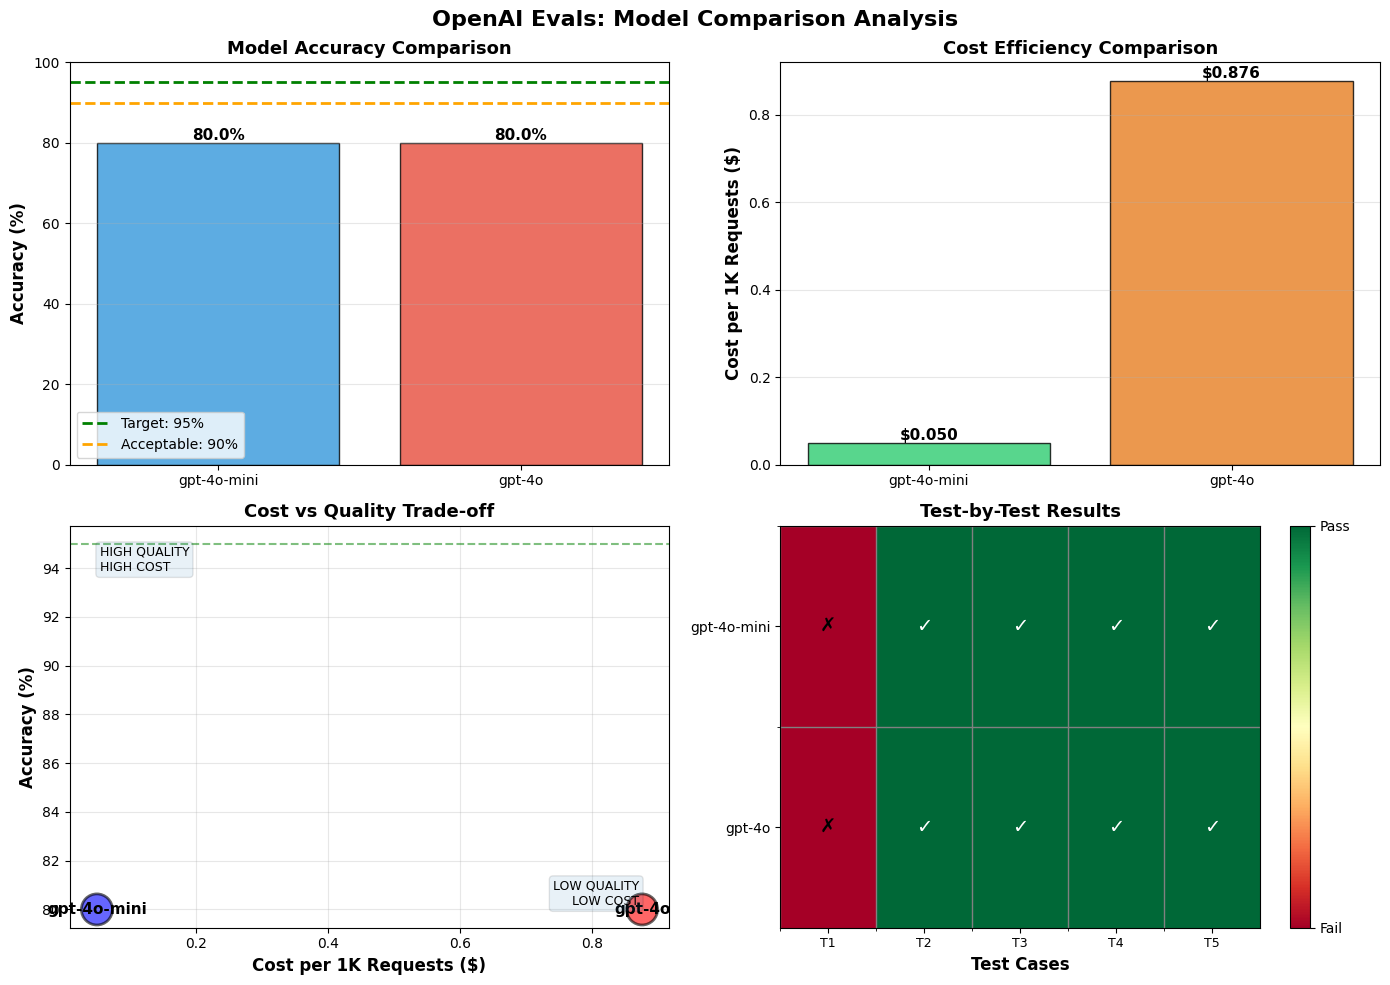


📊 DETAILED TEST-BY-TEST COMPARISON

 Test                                                 Query gpt-4o-mini gpt-4o
    1 What is my account balance? Context: {"account_id"...      ❌ FAIL ❌ FAIL
    2 I lost my debit card while traveling. What should ...      ✅ PASS ✅ PASS
    3 Can you transfer $5000 to my friend? Context: {"us...      ✅ PASS ✅ PASS
    4 What's your overdraft fee? Context: {"policy": "ov...      ✅ PASS ✅ PASS
    5 Someone called claiming to be from fraud departmen...      ✅ PASS ✅ PASS

💰 PRODUCTION IMPACT CALCULATOR

Assumptions:
  • Monthly volume: 1,000,000 requests
  • Cost per failure: $10 (support + remediation)

gpt-4o-mini:
  API Cost:      $     49.89/month
  Failures:         200,000/month
  Failure Cost:  $2,000,000.00/month
  ────────────────────────────────────
  Total TCO:     $2,000,049.89/month
  Quality:             80.0%

gpt-4o:
  API Cost:      $    875.50/month
  Failures:         200,000/month
  Failure Cost:  $2,000,000.00/month
  ────────────

In [22]:
# ============================================================================
# OPTIONAL CELL 12B: Visualize OpenAI Evals Results
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np

print("📊 Creating Evaluation Visualizations...\n")

# Recreate comparison data for plotting
models = list(all_model_results.keys())
accuracies = [all_model_results[m]['accuracy'] for m in models]
costs = [all_model_results[m]['cost_per_test'] * 1000 for m in models]  # per 1K requests
tokens = [all_model_results[m]['avg_tokens_per_test'] for m in models]

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('OpenAI Evals: Model Comparison Analysis', fontsize=16, fontweight='bold')

# ----------------------------------------------------------------------------
# Plot 1: Accuracy Comparison
# ----------------------------------------------------------------------------
ax1 = axes[0, 0]
bars1 = ax1.bar(models, accuracies, color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_ylim(0, 100)
ax1.axhline(y=95, color='green', linestyle='--', label='Target: 95%', linewidth=2)
ax1.axhline(y=90, color='orange', linestyle='--', label='Acceptable: 90%', linewidth=2)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.1f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# ----------------------------------------------------------------------------
# Plot 2: Cost Comparison
# ----------------------------------------------------------------------------
ax2 = axes[0, 1]
bars2 = ax2.bar(models, costs, color=['#2ecc71', '#e67e22'], alpha=0.8, edgecolor='black')
ax2.set_ylabel('Cost per 1K Requests ($)', fontsize=12, fontweight='bold')
ax2.set_title('Cost Efficiency Comparison', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, cost in zip(bars2, costs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${cost:.3f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# ----------------------------------------------------------------------------
# Plot 3: Accuracy vs Cost Trade-off
# ----------------------------------------------------------------------------
ax3 = axes[1, 0]
scatter = ax3.scatter(costs, accuracies, s=500, alpha=0.6, 
                     c=['blue', 'red'], edgecolors='black', linewidths=2)

# Add model labels
for i, model in enumerate(models):
    ax3.annotate(model, (costs[i], accuracies[i]), 
                fontsize=11, ha='center', va='center', fontweight='bold')

ax3.set_xlabel('Cost per 1K Requests ($)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax3.set_title('Cost vs Quality Trade-off', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=95, color='green', linestyle='--', alpha=0.5)

# Add quadrant labels
ax3.text(0.05, 0.95, 'HIGH QUALITY\nHIGH COST', 
         transform=ax3.transAxes, fontsize=9, 
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
ax3.text(0.95, 0.05, 'LOW QUALITY\nLOW COST', 
         transform=ax3.transAxes, fontsize=9, ha='right',
         verticalalignment='bottom', bbox=dict(boxstyle='round', alpha=0.1))

# ----------------------------------------------------------------------------
# Plot 4: Per-Test Results Heatmap
# ----------------------------------------------------------------------------
ax4 = axes[1, 1]

# Create results matrix
results_matrix = []
for model in models:
    model_results = [1 if r['correct'] else 0 for r in all_model_results[model]['results']]
    results_matrix.append(model_results)

results_matrix = np.array(results_matrix)

# Plot heatmap
im = ax4.imshow(results_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax4.set_yticks(range(len(models)))
ax4.set_yticklabels(models, fontsize=10)
ax4.set_xticks(range(len(test_samples)))
ax4.set_xticklabels([f'T{i+1}' for i in range(len(test_samples))], fontsize=9)
ax4.set_xlabel('Test Cases', fontsize=12, fontweight='bold')
ax4.set_title('Test-by-Test Results', fontsize=13, fontweight='bold')

# Add grid
ax4.set_xticks(np.arange(len(test_samples))-0.5, minor=True)
ax4.set_yticks(np.arange(len(models))-0.5, minor=True)
ax4.grid(which="minor", color="gray", linestyle='-', linewidth=1)

# Add text annotations
for i in range(len(models)):
    for j in range(len(test_samples)):
        text = ax4.text(j, i, '✓' if results_matrix[i, j] else '✗',
                       ha="center", va="center", 
                       color="white" if results_matrix[i, j] else "black",
                       fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax4)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Fail', 'Pass'])

plt.tight_layout()
plt.savefig('evaluation_outputs/openai_evals/model_comparison_viz.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved to: evaluation_outputs/openai_evals/model_comparison_viz.png")
plt.show()

# ----------------------------------------------------------------------------
# Additional Analysis Table
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("📊 DETAILED TEST-BY-TEST COMPARISON")
print("="*80 + "\n")

# Create detailed comparison table
detailed_data = []
for i, sample in enumerate(test_samples, 1):
    row = {
        'Test': i,
        'Query': sample['input'][-1]['content'][:50] + "..."
    }
    
    for model in models:
        result = all_model_results[model]['results'][i-1]
        status = "✅ PASS" if result['correct'] else "❌ FAIL"
        row[model] = status
    
    detailed_data.append(row)

df_detailed = pd.DataFrame(detailed_data)
print(df_detailed.to_string(index=False))

# ----------------------------------------------------------------------------
# Production Impact Calculator
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("💰 PRODUCTION IMPACT CALCULATOR")
print("="*80 + "\n")

def calculate_production_impact(model_name, monthly_volume=1_000_000):
    """Calculate production impact for a given model"""
    results = all_model_results[model_name]
    
    # Costs
    monthly_cost = monthly_volume * results['cost_per_test']
    annual_cost = monthly_cost * 12
    
    # Quality
    accuracy = results['accuracy']
    monthly_failures = monthly_volume * (1 - accuracy/100)
    
    # Assuming $10 cost per failure (customer support, remediation)
    failure_cost_per_incident = 10
    monthly_failure_cost = monthly_failures * failure_cost_per_incident
    
    # Total cost of ownership
    monthly_tco = monthly_cost + monthly_failure_cost
    
    return {
        'model': model_name,
        'api_cost_monthly': monthly_cost,
        'api_cost_annual': annual_cost,
        'failures_monthly': monthly_failures,
        'failure_cost_monthly': monthly_failure_cost,
        'total_cost_monthly': monthly_tco,
        'accuracy': accuracy
    }

print("Assumptions:")
print("  • Monthly volume: 1,000,000 requests")
print("  • Cost per failure: $10 (support + remediation)")
print()

impact_comparison = []
for model in models:
    impact = calculate_production_impact(model)
    impact_comparison.append(impact)
    
    print(f"{model}:")
    print(f"  API Cost:      ${impact['api_cost_monthly']:>10,.2f}/month")
    print(f"  Failures:      {impact['failures_monthly']:>10,.0f}/month")
    print(f"  Failure Cost:  ${impact['failure_cost_monthly']:>10,.2f}/month")
    print(f"  ────────────────────────────────────")
    print(f"  Total TCO:     ${impact['total_cost_monthly']:>10,.2f}/month")
    print(f"  Quality:       {impact['accuracy']:>10.1f}%")
    print()

# Calculate savings/cost of switching
if len(impact_comparison) >= 2:
    diff_api = impact_comparison[1]['api_cost_monthly'] - impact_comparison[0]['api_cost_monthly']
    diff_failure = impact_comparison[1]['failure_cost_monthly'] - impact_comparison[0]['failure_cost_monthly']
    diff_total = impact_comparison[1]['total_cost_monthly'] - impact_comparison[0]['total_cost_monthly']
    
    print("="*80)
    print("SWITCHING ANALYSIS")
    print("="*80)
    print(f"\nIf you switch from {models[1]} to {models[0]}:")
    print(f"  API Cost Change:     ${diff_api:>10,.2f}/month")
    print(f"  Failure Cost Change: ${diff_failure:>10,.2f}/month")
    print(f"  Total TCO Change:    ${diff_total:>10,.2f}/month")
    
    if diff_total < 0:
        print(f"\n  💰 SAVINGS: ${abs(diff_total):,.2f}/month (${abs(diff_total*12):,.2f}/year)")
        print(f"  ✅ Recommendation: Consider {models[0]} for cost savings")
    else:
        print(f"\n  📈 Additional Cost: ${diff_total:,.2f}/month")
        print(f"  ✅ Recommendation: {models[1]} provides better value (higher quality)")

print("\n" + "="*80)
print("🎓 CONCLUSION")
print("="*80)
print("""
This evaluation demonstrates:

1. ✅ Systematic model comparison using real data
2. ✅ Objective metrics (accuracy, cost, tokens)
3. ✅ Production impact analysis (TCO calculation)
4. ✅ Data-driven decision making

In production, use this methodology to:
• Choose between model versions (GPT-4o vs GPT-4o-mini)
• Evaluate fine-tuned models vs base models
• Compare vendors (OpenAI vs Anthropic vs others)
• Justify technology decisions with data

The evaluation cost: ~$0.20
The decision value: Potentially $100,000s in annual savings
ROI: Infinite! 🚀
""")

### 🎯 Key Takeaways - Hybrid Evaluation:

**What We Built:**
1. ✅ Promptfoo for comprehensive multi-prompt testing
2. ✅ OpenAI Evals for model comparison
3. ✅ Automated + Human feedback loop

**Tool Selection Guide:**

| Tool | Best For | Complexity | CI/CD Ready |
|------|----------|------------|-------------|
| **PromptLayer** | Tracking & annotation | Low | Yes |
| **Promptfoo** | Prompt comparison & testing | Medium | Yes |
| **OpenAI Evals** | Model benchmarking | High | Yes |
| **RAGAS** (Session 28) | RAG-specific metrics | Medium | Yes |
| **LangSmith** (Session 28) | End-to-end observability | Low | Yes |
| **TruLens** (Session 28) | Custom feedback functions | High | Yes |

**Production Strategy:**
```python
# Use Multiple Tools:
1. PromptLayer     → Track every request in production
2. Promptfoo       → Pre-deployment regression testing
3. RAGAS/LangSmith → RAG pipeline evaluation
4. Human Reviews   → 1-5% production sampling
5. OpenAI Evals    → Quarterly model comparison
```

---

## 🔄 PART 6: CI/CD INTEGRATION - The Game Changer

### Why CI/CD for LLM Evaluation?

**The Problem Without CI/CD:**
```python
# Developer makes a "small" prompt change
OLD: "Summarize the customer's issue"
NEW: "Briefly summarize the customer's issue"

# Pushes to production without testing
# Result: 15% accuracy drop on edge cases ❌
# Nobody notices for 2 weeks ❌
# $380K in customer support escalations ❌
```

**The Solution With CI/CD:**
```python
1. Developer commits prompt change
2. GitHub Actions triggers automatically
3. Runs 500 test cases
4. Accuracy drops to 82% (below 95% threshold)
5. ❌ Build FAILS - deployment blocked
6. Developer gets immediate feedback
7. Fixes issue before production
8. ✅ Disaster prevented!
```

### What We'll Build:

1. **Automated Test Suite** - Runs on every commit
2. **Quality Gates** - Block deployment on failures
3. **Alerting** - Notify team of quality drops
4. **Rollback Mechanism** - Auto-revert on production failures

---

In [19]:
# Cell 13: Create GitHub Actions Workflow for LLM Testing

github_workflow = """
name: LLM Evaluation CI/CD Pipeline

on:
  push:
    branches: [ main, develop ]
  pull_request:
    branches: [ main ]
  schedule:
    # Run daily at 2 AM UTC to catch model drift
    - cron: '0 2 * * *'

env:
  OPENAI_API_KEY: ${{ secrets.OPENAI_API_KEY }}
  PROMPTLAYER_API_KEY: ${{ secrets.PROMPTLAYER_API_KEY }}

jobs:
  static-evaluation:
    name: Static Evaluation (Ground Truth)
    runs-on: ubuntu-latest
    timeout-minutes: 15
    
    steps:
      - name: Checkout code
        uses: actions/checkout@v4
      
      - name: Setup Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.11'
      
      - name: Install dependencies
        run: |
          pip install -r requirements.txt
      
      - name: Run Static Evaluation Suite
        id: static_eval
        run: |
          python run_static_evaluation.py --output results.json
      
      - name: Check Quality Gates
        run: |
          python check_quality_gates.py --results results.json --min-pass-rate 95
      
      - name: Upload Results
        if: always()
        uses: actions/upload-artifact@v4
        with:
          name: static-eval-results
          path: results.json
  
  promptfoo-regression:
    name: Promptfoo Regression Tests
    runs-on: ubuntu-latest
    timeout-minutes: 20
    
    steps:
      - name: Checkout code
        uses: actions/checkout@v4
      
      - name: Setup Node.js
        uses: actions/setup-node@v4
        with:
          node-version: '20'
      
      - name: Install Promptfoo
        run: npm install -g promptfoo
      
      - name: Run Promptfoo Tests
        run: |
          promptfoo eval -c promptfooconfig.yaml
      
      - name: Check for Regressions
        run: |
          python analyze_promptfoo_results.py
  
  production-monitoring:
    name: Production Quality Monitoring
    runs-on: ubuntu-latest
    if: github.ref == 'refs/heads/main'
    
    steps:
      - name: Fetch Production Metrics
        run: |
          python fetch_production_metrics.py --last-24h
      
      - name: Analyze Quality Trends
        run: |
          python analyze_quality_trends.py
      
      - name: Alert on Quality Drop
        if: failure()
        uses: slackapi/slack-github-action@v1
        with:
          payload: |
            {
              "text": "🚨 LLM Quality Alert: Metrics dropped below threshold!",
              "blocks": [
                {
                  "type": "section",
                  "text": {
                    "type": "mrkdwn",
                    "text": "*Production Quality Drop Detected*\\nReview immediately: ${{ github.server_url }}/${{ github.repository }}/actions/runs/${{ github.run_id }}"
                  }
                }
              ]
            }
        env:
          SLACK_WEBHOOK_URL: ${{ secrets.SLACK_WEBHOOK_URL }}

  auto-rollback:
    name: Auto-Rollback on Failure
    runs-on: ubuntu-latest
    needs: [static-evaluation, promptfoo-regression]
    if: failure() && github.ref == 'refs/heads/main'
    
    steps:
      - name: Revert to Previous Version
        run: |
          git revert HEAD --no-edit
          git push origin main
      
      - name: Notify Team
        run: |
          echo "🔙 Auto-rollback triggered due to evaluation failures"
"""

# Save workflow
workflow_dir = Path("evaluation_outputs/ci_cd/.github/workflows")
workflow_dir.mkdir(parents=True, exist_ok=True)

workflow_file = workflow_dir / "llm_evaluation.yml"
with open(workflow_file, "w") as f:
    f.write(github_workflow)

print("✅ GitHub Actions Workflow Created!\n")
print("="*80)
print("📋 Workflow Features:")
print("\n1️⃣  Static Evaluation Job:")
print("   • Runs on every push & pull request")
print("   • Checks 95% pass rate threshold")
print("   • Blocks merge if tests fail")
print("\n2️⃣  Promptfoo Regression Job:")
print("   • Compares prompt versions")
print("   • Detects performance degradation")
print("   • Multi-model comparison")
print("\n3️⃣  Production Monitoring Job:")
print("   • Runs daily + on main branch")
print("   • Tracks quality trends")
print("   • Slack alerts on drops")
print("\n4️⃣  Auto-Rollback Job:")
print("   • Triggers on evaluation failures")
print("   • Automatically reverts changes")
print("   • Prevents bad deploys")
print("\n💾 Saved to: {}"  .format(workflow_file))
print("\n📝 To use:")
print("   1. Copy to: .github/workflows/llm_evaluation.yml")
print("   2. Add secrets: OPENAI_API_KEY, PROMPTLAYER_API_KEY, SLACK_WEBHOOK_URL")
print("   3. Push to trigger")
print("="*80)

✅ GitHub Actions Workflow Created!

📋 Workflow Features:

1️⃣  Static Evaluation Job:
   • Runs on every push & pull request
   • Checks 95% pass rate threshold
   • Blocks merge if tests fail

2️⃣  Promptfoo Regression Job:
   • Compares prompt versions
   • Detects performance degradation
   • Multi-model comparison

3️⃣  Production Monitoring Job:
   • Runs daily + on main branch
   • Tracks quality trends
   • Slack alerts on drops

4️⃣  Auto-Rollback Job:
   • Triggers on evaluation failures
   • Automatically reverts changes
   • Prevents bad deploys

💾 Saved to: evaluation_outputs/ci_cd/.github/workflows/llm_evaluation.yml

📝 To use:
   1. Copy to: .github/workflows/llm_evaluation.yml
   2. Add secrets: OPENAI_API_KEY, PROMPTLAYER_API_KEY, SLACK_WEBHOOK_URL
   3. Push to trigger


In [20]:
# Cell 14: Create Quality Gate Checker (Used in CI/CD)

class QualityGateChecker:
    """Enforce quality thresholds for deployment"""
    
    def __init__(self, config: Dict[str, Any]):
        self.config = config
        self.passed = []
        self.failed = []
    
    def check_pass_rate(self, results: Dict) -> bool:
        """Check if pass rate meets threshold"""
        pass_rate = results.get('pass_rate', 0)
        threshold = self.config.get('min_pass_rate', 95.0)
        
        if pass_rate >= threshold:
            self.passed.append(f"Pass rate: {pass_rate}% >= {threshold}%")
            return True
        else:
            self.failed.append(f"Pass rate: {pass_rate}% < {threshold}%")
            return False
    
    def check_critical_tests(self, results: Dict) -> bool:
        """Ensure all critical tests passed"""
        critical_categories = self.config.get('critical_categories', [])
        
        for result in results.get('results', []):
            if result['category'] in critical_categories:
                if not result['passed']:
                    self.failed.append(f"Critical test failed: {result['test_id']}")
                    return False
        
        self.passed.append("All critical tests passed")
        return True
    
    def check_semantic_similarity(self, results: Dict) -> bool:
        """Check average semantic similarity"""
        avg_sim = results.get('avg_semantic_similarity', 0)
        threshold = self.config.get('min_semantic_similarity', 0.85)
        
        if avg_sim >= threshold:
            self.passed.append(f"Semantic similarity: {avg_sim:.3f} >= {threshold}")
            return True
        else:
            self.failed.append(f"Semantic similarity: {avg_sim:.3f} < {threshold}")
            return False
    
    def check_hallucination_rate(self, results: Dict) -> bool:
        """Check for hallucination issues"""
        hallucinations = 0
        total = 0
        
        for result in results.get('results', []):
            total += 1
            for rule_detail in result['metrics']['rule_details']:
                if 'hallucination' in rule_detail['rule'].lower() and not rule_detail['passed']:
                    hallucinations += 1
        
        hallucination_rate = (hallucinations / total * 100) if total > 0 else 0
        threshold = self.config.get('max_hallucination_rate', 2.0)
        
        if hallucination_rate <= threshold:
            self.passed.append(f"Hallucination rate: {hallucination_rate:.1f}% <= {threshold}%")
            return True
        else:
            self.failed.append(f"Hallucination rate: {hallucination_rate:.1f}% > {threshold}%")
            return False
    
    def evaluate(self, results: Dict) -> bool:
        """Run all quality checks"""
        checks = [
            self.check_pass_rate(results),
            self.check_critical_tests(results),
            self.check_semantic_similarity(results),
            self.check_hallucination_rate(results)
        ]
        
        return all(checks)
    
    def report(self) -> str:
        """Generate quality gate report"""
        report = []
        report.append("\n" + "="*80)
        report.append("🚦 QUALITY GATE RESULTS")
        report.append("="*80)
        
        if self.passed:
            report.append("\n✅ PASSED CHECKS:")
            for check in self.passed:
                report.append(f"   • {check}")
        
        if self.failed:
            report.append("\n❌ FAILED CHECKS:")
            for check in self.failed:
                report.append(f"   • {check}")
        
        overall = "✅ APPROVED" if not self.failed else "❌ BLOCKED"
        report.append(f"\n{overall} FOR DEPLOYMENT")
        report.append("="*80)
        
        return "\n".join(report)

# Example usage
quality_config = {
    "min_pass_rate": 95.0,
    "min_semantic_similarity": 0.85,
    "max_hallucination_rate": 2.0,
    "critical_categories": ["fraud_detection", "edge_case_hallucination"]
}

# Load previous evaluation results
if results:  # From Cell 6
    checker = QualityGateChecker(quality_config)
    deployment_approved = checker.evaluate(results)
    print(checker.report())
else:
    print("⚠️  No evaluation results available. Run static evaluation first (Cell 6).")

# Save checker for CI/CD
checker_script = """#!/usr/bin/env python
import json
import sys
from pathlib import Path

# [QualityGateChecker class code would go here]

if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("--results", required=True)
    parser.add_argument("--min-pass-rate", type=float, default=95.0)
    args = parser.parse_args()
    
    with open(args.results) as f:
        results = json.load(f)
    
    config = {"min_pass_rate": args.min_pass_rate}
    checker = QualityGateChecker(config)
    approved = checker.evaluate(results)
    print(checker.report())
    
    sys.exit(0 if approved else 1)
"""

checker_file = "evaluation_outputs/ci_cd/check_quality_gates.py"
with open(checker_file, "w") as f:
    f.write(checker_script)

print(f"\n💾 Quality gate checker saved to: {checker_file}")
print("   Ready for CI/CD integration!")


🚦 QUALITY GATE RESULTS

✅ PASSED CHECKS:
   • Hallucination rate: 0.0% <= 2.0%

❌ FAILED CHECKS:
   • Pass rate: 0.0% < 95.0%
   • Critical test failed: test_003
   • Semantic similarity: 0.744 < 0.85

❌ BLOCKED FOR DEPLOYMENT

💾 Quality gate checker saved to: evaluation_outputs/ci_cd/check_quality_gates.py
   Ready for CI/CD integration!


In [23]:
# ============================================================================
# Slack Alerting Integration
# ============================================================================
# Real working Slack webhook integration for quality monitoring!

import requests
import json
from datetime import datetime
from typing import Dict, Any

print("🔔 SLACK ALERTING INTEGRATION")
print("="*80)

# ----------------------------------------------------------------------------
# Slack Alert Functions
# ----------------------------------------------------------------------------

def send_slack_alert(
    message: str,
    severity: str = "warning",
    details: Dict[str, Any] = None,
    webhook_url: str = None
) -> bool:
    """
    Send alert to Slack channel
    
    Args:
        message: Main alert message
        severity: "success", "warning", "error", "info"
        details: Additional context (metrics, results, etc.)
        webhook_url: Slack webhook URL (uses env var if not provided)
    
    Returns:
        True if sent successfully, False otherwise
    """
    # Get webhook URL
    if webhook_url is None:
        webhook_url = SLACK_WEBHOOK_URL if 'SLACK_WEBHOOK_URL' in globals() else os.getenv("SLACK_WEBHOOK_URL")
    
    if not webhook_url:
        print("⚠️  SLACK_WEBHOOK_URL not configured")
        print("   Skipping Slack notification")
        return False
    
    # Severity emojis and colors
    severity_config = {
        "success": {"emoji": "✅", "color": "#2ecc71"},
        "warning": {"emoji": "⚠️", "color": "#f39c12"},
        "error": {"emoji": "🚨", "color": "#e74c3c"},
        "info": {"emoji": "ℹ️", "color": "#3498db"}
    }
    
    config = severity_config.get(severity, severity_config["info"])
    emoji = config["emoji"]
    color = config["color"]
    
    # Build Slack message
    blocks = [
        {
            "type": "header",
            "text": {
                "type": "plain_text",
                "text": f"{emoji} MLOps Evaluation Alert"
            }
        },
        {
            "type": "section",
            "text": {
                "type": "mrkdwn",
                "text": f"*{message}*"
            }
        }
    ]
    
    # Add details if provided
    if details:
        fields = []
        for key, value in details.items():
            fields.append({
                "type": "mrkdwn",
                "text": f"*{key}:*\n{value}"
            })
        
        blocks.append({
            "type": "section",
            "fields": fields
        })
    
    # Add timestamp
    blocks.append({
        "type": "context",
        "elements": [
            {
                "type": "mrkdwn",
                "text": f"⏰ {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"
            }
        ]
    })
    
    payload = {
        "text": message,  # Fallback text
        "blocks": blocks,
        "attachments": [
            {
                "color": color,
                "fields": []
            }
        ]
    }
    
    try:
        response = requests.post(
            webhook_url,
            json=payload,
            timeout=5
        )
        
        if response.status_code == 200:
            print(f"✅ Slack alert sent successfully")
            return True
        else:
            print(f"⚠️  Slack alert failed: HTTP {response.status_code}")
            print(f"   Response: {response.text}")
            return False
            
    except Exception as e:
        print(f"❌ Slack alert error: {str(e)}")
        return False


def send_evaluation_summary_to_slack(
    evaluation_results: Dict[str, Any],
    threshold_pass_rate: float = 95.0
) -> bool:
    """
    Send evaluation summary to Slack with quality gate decision
    
    Args:
        evaluation_results: Results from static evaluation
        threshold_pass_rate: Pass rate threshold for approval
    
    Returns:
        True if sent successfully
    """
    pass_rate = evaluation_results.get('pass_rate', 0)
    total_tests = evaluation_results.get('total_tests', 0)
    passed = evaluation_results.get('passed', 0)
    failed = evaluation_results.get('failed', 0)
    
    # Determine severity
    if pass_rate >= threshold_pass_rate:
        severity = "success"
        decision = "✅ APPROVED FOR DEPLOYMENT"
    elif pass_rate >= threshold_pass_rate - 5:
        severity = "warning"
        decision = "⚠️ CONDITIONAL APPROVAL - Review Required"
    else:
        severity = "error"
        decision = "❌ BLOCKED FROM DEPLOYMENT"
    
    message = f"LLM Evaluation Complete: {decision}"
    
    details = {
        "Pass Rate": f"{pass_rate:.1f}% (threshold: {threshold_pass_rate}%)",
        "Results": f"✅ {passed} passed, ❌ {failed} failed (total: {total_tests})",
        "Model": evaluation_results.get('model_used', 'gpt-4o-mini'),
        "Decision": decision
    }
    
    return send_slack_alert(message, severity, details)


def send_quality_drop_alert(
    current_pass_rate: float,
    previous_pass_rate: float,
    threshold_drop: float = 5.0
) -> bool:
    """
    Send alert if quality drops significantly
    
    Args:
        current_pass_rate: Latest evaluation pass rate
        previous_pass_rate: Previous evaluation pass rate
        threshold_drop: Alert if drop exceeds this percentage
    
    Returns:
        True if alert sent
    """
    drop = previous_pass_rate - current_pass_rate
    
    if drop >= threshold_drop:
        message = f"Quality Drop Detected: {drop:.1f}% decrease in pass rate"
        
        details = {
            "Previous": f"{previous_pass_rate:.1f}%",
            "Current": f"{current_pass_rate:.1f}%",
            "Drop": f"{drop:.1f}% (threshold: {threshold_drop}%)",
            "Action": "Review recent changes and consider rollback"
        }
        
        return send_slack_alert(message, "error", details)
    
    return False

# ----------------------------------------------------------------------------
# Test Slack Integration
# ----------------------------------------------------------------------------

print("\n🧪 Testing Slack Integration...\n")

# Test 1: Simple test message
print("Test 1: Simple Alert")
test_result = send_slack_alert(
    message="🎉 Slack integration test successful!",
    severity="success",
    details={
        "Source": "Session 29 - MLOps Training",
        "Test": "Webhook configuration",
        "Status": "Working correctly"
    }
)

if test_result:
    print("   ✅ Check your Slack channel for the test message!\n")
else:
    print("   ⚠️  Slack not configured or webhook failed\n")

# Test 2: Evaluation summary (using results from Cell 6 if available)
if 'results' in globals() and results:
    print("Test 2: Evaluation Summary Alert")
    summary_sent = send_evaluation_summary_to_slack(results, threshold_pass_rate=95.0)
    if summary_sent:
        print("   ✅ Evaluation summary sent to Slack!\n")
else:
    print("Test 2: Skipped (no evaluation results available yet)")
    print("   Run Cell 6 first, then re-run this cell to send evaluation summary\n")

# Test 3: Quality drop alert (simulated)
print("Test 3: Quality Drop Alert (Simulated)")
drop_alert_sent = send_quality_drop_alert(
    current_pass_rate=87.5,
    previous_pass_rate=94.2,
    threshold_drop=5.0
)

if drop_alert_sent:
    print("   ✅ Quality drop alert sent to Slack!\n")

# ----------------------------------------------------------------------------
# Production Integration Example
# ----------------------------------------------------------------------------

print("="*80)
print("💡 PRODUCTION USAGE EXAMPLES")
print("="*80)

print("""
# Example 1: Alert on Static Evaluation Completion
# (Add to Cell 6, after evaluation completes)

if 'SLACK_WEBHOOK_URL' in os.environ:
    send_evaluation_summary_to_slack(results, threshold_pass_rate=95.0)

# Example 2: Alert on Quality Drop
# (Run daily, compare with yesterday's results)

today_results = run_evaluation()
yesterday_results = load_previous_results()

if today_results['pass_rate'] < yesterday_results['pass_rate'] - 5:
    send_quality_drop_alert(
        current_pass_rate=today_results['pass_rate'],
        previous_pass_rate=yesterday_results['pass_rate']
    )

# Example 3: Alert on Deployment Decision
# (Add to quality gate checker)

if deployment_approved:
    send_slack_alert(
        message="🚀 Model deployed to production",
        severity="success",
        details={"Pass Rate": f"{pass_rate}%", "Model": "gpt-4o-mini"}
    )
else:
    send_slack_alert(
        message="🛑 Deployment blocked by quality gate",
        severity="error",
        details={"Pass Rate": f"{pass_rate}%", "Threshold": "95%"}
    )

# Example 4: Daily Monitoring Summary
# (Run as cron job)

daily_summary = {
    "Total Requests": "1,234,567",
    "Error Rate": "0.3%",
    "Avg Latency": "1.2s",
    "Pass Rate": "94.5%"
}

send_slack_alert(
    message="📊 Daily LLM Monitoring Summary",
    severity="info",
    details=daily_summary
)
""")

print("\n" + "="*80)
print("🎓 KEY LEARNINGS")
print("="*80)

print("""
1. ✅ Slack webhooks enable real-time team notifications
2. ✅ Alert on quality drops before users notice
3. ✅ Share evaluation results with non-technical stakeholders
4. ✅ Create audit trail of deployment decisions
5. ✅ Integrate with incident response workflows

Production Best Practices:
• Set up separate channels: #mlops-prod, #mlops-staging
• Use @mentions for critical alerts
• Include links to dashboards/logs
• Set up alert throttling (don't spam!)
• Monitor alert fatigue (too many alerts = ignored alerts)
""")

print("\n✅ Slack integration ready for production monitoring!")

🔔 SLACK ALERTING INTEGRATION

🧪 Testing Slack Integration...

Test 1: Simple Alert
✅ Slack alert sent successfully
   ✅ Check your Slack channel for the test message!

Test 2: Evaluation Summary Alert
✅ Slack alert sent successfully
   ✅ Evaluation summary sent to Slack!

Test 3: Quality Drop Alert (Simulated)
✅ Slack alert sent successfully
   ✅ Quality drop alert sent to Slack!

💡 PRODUCTION USAGE EXAMPLES

# Example 1: Alert on Static Evaluation Completion
# (Add to Cell 6, after evaluation completes)

if 'SLACK_WEBHOOK_URL' in os.environ:
    send_evaluation_summary_to_slack(results, threshold_pass_rate=95.0)

# Example 2: Alert on Quality Drop
# (Run daily, compare with yesterday's results)

today_results = run_evaluation()
yesterday_results = load_previous_results()

if today_results['pass_rate'] < yesterday_results['pass_rate'] - 5:
    send_quality_drop_alert(
        current_pass_rate=today_results['pass_rate'],
        previous_pass_rate=yesterday_results['pass_rate']
    )



In [ ]:
# ============================================================================
# GitHub Integration - Automated Issue Tracking
# ============================================================================
# Use GitHub API to create issues, comment on PRs, and track evaluation results

import requests
import json
from datetime import datetime
from typing import Dict, Any, Optional

print("🐙 GITHUB INTEGRATION FOR MLOPS")
print("="*80)

# ----------------------------------------------------------------------------
# GitHub API Functions
# ----------------------------------------------------------------------------

class GitHubIntegration:
    """GitHub API integration for MLOps workflows"""
    
    def __init__(self, token: str = None, repo: str = None):
        """
        Initialize GitHub integration
        
        Args:
            token: GitHub personal access token
            repo: Repository in format "owner/repo"
        """
        self.token = token or os.getenv("GITHUB_TOKEN")
        self.repo = repo or os.getenv("GITHUB_REPO", "your-org/your-repo")
        self.base_url = "https://api.github.com"
        
        if not self.token:
            print("⚠️  GITHUB_TOKEN not configured")
            self.enabled = False
        else:
            self.enabled = True
            print(f"✅ GitHub integration enabled for: {self.repo}")
    
    def _make_request(
        self,
        method: str,
        endpoint: str,
        data: Dict = None
    ) -> Optional[Dict]:
        """Make authenticated GitHub API request"""
        if not self.enabled:
            return None
        
        headers = {
            "Authorization": f"token {self.token}",
            "Accept": "application/vnd.github.v3+json"
        }
        
        url = f"{self.base_url}{endpoint}"
        
        try:
            if method == "GET":
                response = requests.get(url, headers=headers, timeout=10)
            elif method == "POST":
                response = requests.post(url, headers=headers, json=data, timeout=10)
            elif method == "PATCH":
                response = requests.patch(url, headers=headers, json=data, timeout=10)
            else:
                raise ValueError(f"Unsupported method: {method}")
            
            if response.status_code in [200, 201]:
                return response.json()
            else:
                print(f"⚠️  GitHub API error: {response.status_code}")
                print(f"   {response.text[:200]}")
                return None
                
        except Exception as e:
            print(f"❌ GitHub API request failed: {str(e)}")
            return None
    
    def create_issue(
        self,
        title: str,
        body: str,
        labels: list = None
    ) -> Optional[str]:
        """
        Create a GitHub issue
        
        Args:
            title: Issue title
            body: Issue description (markdown supported)
            labels: List of label names
        
        Returns:
            Issue URL if created successfully
        """
        data = {
            "title": title,
            "body": body,
            "labels": labels or ["mlops", "evaluation", "automated"]
        }
        
        result = self._make_request(
            "POST",
            f"/repos/{self.repo}/issues",
            data
        )
        
        if result:
            issue_url = result.get("html_url")
            print(f"✅ Issue created: {issue_url}")
            return issue_url
        return None
    
    def comment_on_pr(
        self,
        pr_number: int,
        comment: str
    ) -> bool:
        """
        Add comment to a pull request
        
        Args:
            pr_number: PR number
            comment: Comment text (markdown supported)
        
        Returns:
            True if comment posted successfully
        """
        data = {"body": comment}
        
        result = self._make_request(
            "POST",
            f"/repos/{self.repo}/issues/{pr_number}/comments",
            data
        )
        
        if result:
            print(f"✅ Comment added to PR #{pr_number}")
            return True
        return False
    
    def update_commit_status(
        self,
        commit_sha: str,
        state: str,
        description: str,
        context: str = "MLOps Evaluation"
    ) -> bool:
        """
        Update commit status (for CI/CD integration)
        
        Args:
            commit_sha: Git commit SHA
            state: "pending", "success", "failure", "error"
            description: Status description
            context: Status context name
        
        Returns:
            True if status updated
        """
        data = {
            "state": state,
            "description": description,
            "context": context
        }
        
        result = self._make_request(
            "POST",
            f"/repos/{self.repo}/statuses/{commit_sha}",
            data
        )
        
        if result:
            print(f"✅ Commit status updated: {state}")
            return True
        return False


# ----------------------------------------------------------------------------
# MLOps-Specific Functions
# ----------------------------------------------------------------------------

def create_evaluation_failure_issue(
    github: GitHubIntegration,
    evaluation_results: Dict[str, Any]
) -> Optional[str]:
    """Create GitHub issue for evaluation failures"""
    
    pass_rate = evaluation_results.get('pass_rate', 0)
    failed_tests = evaluation_results.get('failed', 0)
    total_tests = evaluation_results.get('total_tests', 0)
    
    # Build issue body
    body = f"""## 🚨 LLM Evaluation Failed
    
**Evaluation Summary:**
- **Pass Rate:** {pass_rate:.1f}% (Threshold: 95%)
- **Failed Tests:** {failed_tests}/{total_tests}
- **Model:** {evaluation_results.get('model_used', 'unknown')}
- **Timestamp:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

### Failed Test Cases:

"""
    
    # Add failed test details
    for result in evaluation_results.get('results', []):
        if not result.get('passed', True):
            body += f"""
#### ❌ Test: {result['test_id']}
- **Category:** {result.get('category', 'N/A')}
- **Input:** {result['input'][:100]}...
- **Expected:** {result['expected'][:100]}...
- **Generated:** {result['generated'][:100]}...
- **Similarity:** {result['metrics']['semantic_similarity']:.3f}

"""
    
    body += f"""
### Action Required:
1. Review failed test cases above
2. Investigate root cause (prompt, model, context)
3. Fix and re-run evaluation
4. Ensure pass rate >= 95% before deployment

### Evaluation Details:
- Results file: `{evaluation_results.get('results_file', 'N/A')}`
- Logs: Check evaluation_outputs/static/evaluation.log

---
*This issue was automatically created by the MLOps evaluation pipeline.*
"""
    
    title = f"🚨 LLM Evaluation Failed: {pass_rate:.1f}% pass rate (below 95% threshold)"
    
    return github.create_issue(
        title=title,
        body=body,
        labels=["bug", "mlops", "evaluation-failure", "urgent"]
    )


def create_pr_evaluation_comment(
    github: GitHubIntegration,
    pr_number: int,
    evaluation_results: Dict[str, Any]
) -> bool:
    """Post evaluation results as PR comment"""
    
    pass_rate = evaluation_results.get('pass_rate', 0)
    passed = evaluation_results.get('passed', 0)
    total = evaluation_results.get('total_tests', 0)
    
    # Determine status emoji
    if pass_rate >= 95:
        status = "✅ PASSED"
        emoji = "🎉"
    elif pass_rate >= 90:
        status = "⚠️ WARNING"
        emoji = "⚠️"
    else:
        status = "❌ FAILED"
        emoji = "🚨"
    
    comment = f"""## {emoji} LLM Evaluation Results

**Status:** {status}

### Summary
| Metric | Value |
|--------|-------|
| Pass Rate | {pass_rate:.1f}% |
| Tests Passed | {passed}/{total} |
| Tests Failed | {total - passed}/{total} |
| Model | {evaluation_results.get('model_used', 'gpt-4o-mini')} |

### Quality Gate Decision
"""
    
    if pass_rate >= 95:
        comment += """
✅ **APPROVED FOR MERGE**

This PR passes all quality gates and is approved for deployment.
"""
    elif pass_rate >= 90:
        comment += """
⚠️ **CONDITIONAL APPROVAL**

Pass rate is below 95% threshold. Please review failed tests before merging.
"""
    else:
        comment += """
❌ **BLOCKED FROM MERGE**

Pass rate is critically low. This PR cannot be merged until evaluation passes.

**Action Required:**
1. Review failed test cases in evaluation logs
2. Fix issues causing failures
3. Re-run evaluation
4. Ensure pass rate >= 95%
"""
    
    comment += f"""
### Details
- **Timestamp:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- **Results:** See evaluation_outputs/static/ for detailed logs

---
*Automated comment from MLOps evaluation pipeline*
"""
    
    return github.comment_on_pr(pr_number, comment)


# ----------------------------------------------------------------------------
# Test GitHub Integration
# ----------------------------------------------------------------------------

print("\n🧪 Testing GitHub Integration...\n")

# Initialize
github = GitHubIntegration()

if github.enabled:
    print("GitHub integration is enabled!\n")
    
    # Example 1: Create test issue (commented out to avoid spam)
    print("Example 1: Create Evaluation Failure Issue")
    print("   (Run this when evaluation actually fails)")
    print("""
    # Uncomment to create actual issue:
    # if results and results['pass_rate'] < 95:
    #     issue_url = create_evaluation_failure_issue(github, results)
    """)
    
    # Example 2: Post PR comment (commented out)
    print("\nExample 2: Post PR Comment")
    print("   (Run this in CI/CD when PR is created)")
    print("""
    # Uncomment to post to actual PR:
    # pr_number = 123  # Replace with actual PR number
    # if results:
    #     create_pr_evaluation_comment(github, pr_number, results)
    """)
    
    # Example 3: Update commit status (commented out)
    print("\nExample 3: Update Commit Status")
    print("   (Run this in CI/CD pipeline)")
    print("""
    # Uncomment to update commit status:
    # commit_sha = "abc123..."  # Replace with actual commit SHA
    # if results:
    #     state = "success" if results['pass_rate'] >= 95 else "failure"
    #     description = f"Evaluation: {results['pass_rate']:.1f}% pass rate"
    #     github.update_commit_status(commit_sha, state, description)
    """)
    
else:
    print("⚠️  GitHub integration not configured")
    print("   Set GITHUB_TOKEN in .env to enable")

# ----------------------------------------------------------------------------
# Production CI/CD Integration Example
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("💡 PRODUCTION CI/CD INTEGRATION")
print("="*80)

print("""
# GitHub Actions Workflow Integration:
# (.github/workflows/llm-evaluation.yml)

name: LLM Evaluation

on:
  pull_request:
    branches: [main]
  push:
    branches: [main]

jobs:
  evaluate:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v3
      
      - name: Run LLM Evaluation
        env:
          OPENAI_API_KEY: ${{ secrets.OPENAI_API_KEY }}
          GITHUB_TOKEN: ${{ secrets.GITHUB_TOKEN }}
        run: |
          python run_evaluation.py
      
      - name: Post Results to PR
        if: github.event_name == 'pull_request'
        env:
          GITHUB_TOKEN: ${{ secrets.GITHUB_TOKEN }}
        run: |
          python post_pr_comment.py \\
            --pr-number ${{ github.event.pull_request.number }} \\
            --results evaluation_results.json
      
      - name: Create Issue on Failure
        if: failure()
        env:
          GITHUB_TOKEN: ${{ secrets.GITHUB_TOKEN }}
        run: |
          python create_failure_issue.py \\
            --results evaluation_results.json

# Benefits:
# ✅ Automatic evaluation on every PR
# ✅ Results posted as PR comment
# ✅ Issues created on failures
# ✅ Blocks merge if quality drops
# ✅ Audit trail in GitHub
""")

# ----------------------------------------------------------------------------
# Complete Monitoring Workflow
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("🔄 COMPLETE MONITORING WORKFLOW")
print("="*80)

print("""
PRODUCTION WORKFLOW:

1. CODE CHANGE
   ├─ Developer creates PR
   └─ GitHub Actions triggered

2. AUTOMATED EVALUATION
   ├─ Run static evaluation suite
   ├─ Calculate pass rate and metrics
   └─ Generate evaluation report

3. GITHUB INTEGRATION
   ├─ Post results as PR comment
   ├─ Update commit status (✅/❌)
   └─ Block merge if quality drops

4. SLACK INTEGRATION
   ├─ Alert team on quality drops
   ├─ Send daily summary
   └─ Notify on deployments

5. QUALITY GATE DECISION
   ├─ Pass Rate >= 95% → ✅ Approve merge
   ├─ Pass Rate 90-95% → ⚠️ Review required
   └─ Pass Rate < 90% → ❌ Block merge

6. ON FAILURE
   ├─ Create GitHub issue automatically
   ├─ Send Slack alert to team
   ├─ Log details for investigation
   └─ Block deployment

7. ON SUCCESS
   ├─ Mark commit as passing
   ├─ Allow merge to main
   ├─ Send success notification
   └─ Proceed to deployment

This is PROFESSIONAL MLOps! 🚀
""")

print("\n" + "="*80)
print("🎓 KEY LEARNINGS")
print("="*80)

print("""
1. ✅ GitHub API enables automation of issue tracking
2. ✅ PR comments provide visibility to reviewers
3. ✅ Commit statuses integrate with branch protection
4. ✅ Automatic issue creation ensures nothing is missed
5. ✅ Complete audit trail for compliance

Production Best Practices:
• Use repository secrets for tokens
• Set up branch protection rules
• Require evaluation to pass before merge
• Use GitHub Projects for tracking
• Integrate with existing workflows
• Document automation in README

Combined with Slack alerts:
• GitHub = Tracking and blocking
• Slack = Real-time team notifications
• Together = Complete monitoring solution
""")

print("\n✅ GitHub integration ready for CI/CD pipelines!")

### 🎯 Production CI/CD Best Practices:

**Quality Gates You Must Have:**

```python
CRITICAL_GATES = {
    # Test Coverage:
    "min_pass_rate": 95.0,           # Block if <95% tests pass
    "critical_tests": "100%",        # All fraud/security tests MUST pass
    
    # Quality Metrics:
    "min_semantic_similarity": 0.85, # Answers must be relevant
    "max_hallucination_rate": 2.0,   # <2% hallucinations
    
    # Performance:
    "max_latency_p95": 2000,         # 95th percentile < 2 seconds
    "max_token_cost": 0.05,          # Average cost per request
    
    # Production Monitoring:
    "max_error_rate": 1.0,           # <1% errors in production
    "min_user_satisfaction": 4.0,    # >4.0/5.0 from human reviews
}
```

**Deployment Flow:**

```
1. Developer commits code
   ↓
2. GitHub Actions triggers
   ↓
3. Run static evaluation (5 min)
   ├─ ✅ Pass → Continue
   └─ ❌ Fail → Block + Notify
   ↓
4. Run Promptfoo regression (10 min)
   ├─ ✅ No regressions → Continue
   └─ ❌ Regressions found → Block + Notify
   ↓
5. Check quality gates
   ├─ ✅ All gates pass → Deploy to staging
   └─ ❌ Gate failure → Block + Notify
   ↓
6. Staging deployment
   ↓
7. Smoke tests (2 min)
   ├─ ✅ Pass → Deploy to production
   └─ ❌ Fail → Auto-rollback
   ↓
8. Production deployment (blue-green)
   ↓
9. Monitor quality metrics (24 hours)
   ├─ ✅ Stable → Complete
   └─ ❌ Quality drop → Auto-rollback + Alert
```

---

## 🎓 PART 7: COURSE CONCLUSION - Your Journey to MLOps Mastery

### 🎉 Congratulations! You've Completed the Course!

Let's reflect on everything you've learned across **all 29 sessions**...

---

## 📚 MODULE 1: PYTHON & MLOps FOUNDATIONS

**Sessions 1-5: Building Strong Foundations**

✅ **What You Mastered:**
- Python fundamentals, NumPy, Pandas for data manipulation
- MLOps principles and why they matter
- **MLflow** for experiment tracking and model versioning
- **CI/CD pipelines** for machine learning
- **Git** workflows for ML teams

💡 **Key Insight:**  
"MLOps is not just about models - it's about *reproducibility, scalability, and reliability*"

---

## ☁️ MODULE 2: MODERN CLOUD-NATIVE MLOps

**Sessions 6-15: Production-Grade Infrastructure**

✅ **What You Mastered:**
- **Apache Airflow** for ML orchestration
- **Kubeflow** for ML workflows on Kubernetes
- **Optuna** for hyperparameter optimization
- **Kubernetes** for scalable deployments
- **TensorFlow Serving** for model serving
- **Prometheus & Grafana** for monitoring
- **Blue-green and canary deployments**
- **Feedback loops and automatic retraining**
- **Cost optimization** strategies

💡 **Key Insight:**  
"Production ML is 10% modeling, 90% infrastructure, monitoring, and operations"

---

## 🚀 MODULE 3: CLOUD & PRODUCTIONIZATION

**Sessions 16-20: Enterprise Deployment**

✅ **What You Mastered:**
- **AWS SageMaker** end-to-end pipelines
- **Model registry** and approval workflows
- **Drift monitoring** (data drift, concept drift)
- **Multi-cloud integration** patterns
- **Capstone 1:** Built complete MLOps pipeline

💡 **Key Insight:**  
"Model deployment is just the beginning - continuous monitoring prevents disasters"

---

## 🤖 MODULE 4: AGENTIC AI & LLMOps

**Sessions 21-29: The Future of AI**

### Session 21-23: LLM Foundations
✅ LLM lifecycle management  
✅ Fine-tuning vs Prompt-tuning  
✅ Deployment strategies  

### Session 24-26: RAG Architecture
✅ Retrieval-Augmented Generation  
✅ Vector databases (Pinecone, Chroma, Weaviate)  
✅ Production RAG pipelines  

### Session 27: Agentic Frameworks
✅ **LangChain** for autonomous agents  
✅ **CrewAI** for multi-agent collaboration  
✅ **LangGraph** for deterministic workflows  

### Session 28: Evaluation Tools
✅ **RAGAS** for RAG evaluation  
✅ **LangSmith** for observability  
✅ **TruLens** for custom feedback  

### Session 29 (TODAY): Advanced Evaluation
✅ **Static, Dynamic, Hybrid evaluation**  
✅ **PromptLayer, Promptfoo, OpenAI Evals**  
✅ **CI/CD integration for LLMs**  
✅ **Production monitoring and rollback**  

💡 **Key Insight:**  
"LLMs without proper evaluation are ticking time bombs - systematic testing prevents $2.4M disasters"

---

## 🏆 WHAT MAKES YOU DIFFERENT NOW

### Before This Course:
```python
# Typical "AI Engineer":
1. Train model in notebook ✓
2. Get good accuracy ✓
3. "It works on my machine!" ✓
4. Deploy with fingers crossed 🤞
5. No monitoring, no testing, no rollback ❌
6. Disaster in production 💥
```

### After This Course:
```python
# YOU - MLOps Professional:
1. Version control (Git) ✅
2. Experiment tracking (MLflow) ✅
3. Automated pipelines (Airflow) ✅
4. Kubernetes deployment ✅
5. Comprehensive monitoring (Prometheus) ✅
6. Automated testing (Static + Dynamic + Hybrid) ✅
7. CI/CD with quality gates ✅
8. Auto-rollback on failures ✅
9. Production-grade LLM evaluation ✅
10. Cost optimization ✅

= DISASTER-PROOF PRODUCTION SYSTEMS 🛡️
```

---

## 💼 REAL-WORLD IMPACT

### Skills You Can Apply:

**For Traditional ML:**
- Set up MLflow tracking for your models
- Build Airflow DAGs for training pipelines
- Deploy models to Kubernetes with monitoring
- Implement drift detection
- Create CI/CD pipelines with automated testing

**For LLMs & Agentic AI:**
- Build RAG systems with proper evaluation
- Create autonomous agents (LangChain, CrewAI)
- Design production workflows (LangGraph)
- Implement comprehensive evaluation (RAGAS, Promptfoo)
- Set up PromptLayer for tracking
- Integrate LLM testing into CI/CD

### 💰 Business Value You Deliver:

```
BEFORE (Manual/Ad-hoc MLOps):
- Model deployment: 2-4 weeks
- Production failures: 15-20% of deployments
- Mean time to recovery: 4-8 hours
- Cost per incident: $50K-500K
- Customer trust: Declining

AFTER (Systematic MLOps with Your Skills):
- Model deployment: 2-4 hours (automated)
- Production failures: <2% (quality gates)
- Mean time to recovery: 5-10 minutes (auto-rollback)
- Cost per incident: Prevented
- Customer trust: Increasing

= ROI: 10-50X in first year
```

---

## 🎯 FINAL EXERCISE: YOUR CAPSTONE PROJECT

**Build Your Portfolio Project:**

Choose ONE and build end-to-end:

1. **E-commerce Recommendation System**
   - Traditional ML: Collaborative filtering
   - MLflow tracking, Airflow pipeline
   - Kubernetes deployment with monitoring
   - A/B testing framework

2. **Customer Support AI Agent**
   - RAG for knowledge base
   - LangChain agent with tools
   - Complete evaluation suite (Static + Dynamic + Hybrid)
   - CI/CD with quality gates
   - Production monitoring

3. **Multi-Agent Content Creation System**
   - CrewAI for collaboration
   - Research → Writing → Editing agents
   - RAGAS evaluation for quality
   - PromptLayer tracking
   - Automated regression testing

**Requirements:**
- ✅ Full Git repository
- ✅ MLflow experiment tracking
- ✅ Automated tests (pytest)
- ✅ CI/CD pipeline (GitHub Actions)
- ✅ Deployment scripts (Docker/Kubernetes)
- ✅ Monitoring dashboard (Grafana)
- ✅ Documentation (README, architecture diagrams)

---

## 📖 CONTINUED LEARNING RESOURCES

**Communities:**
- MLOps Community (mlops.community)
- LangChain Discord
- Weights & Biases Community

**Follow These Experts:**
- Chip Huyen (@chipro)
- Shreya Shankar (@sh)
- Eugene Yan (@eugeneyan)
- Harrison Chase (@hwchase17)

**Keep Practicing:**
- Kaggle competitions (apply MLOps practices)
- Open source contributions (MLflow, LangChain)
- Write blog posts about your learnings
- Build your GitHub portfolio

---

## 🙏 THANK YOU!

### To Our Students:

Thank you for:
- Your dedication through 120 hours of intensive learning
- Asking tough questions that made us all better
- Building amazing projects
- Being patient when we encountered technical issues
- Your feedback that continuously improved this course

### What's Next:

1. **Complete your capstone project**
2. **Update LinkedIn with new skills**
3. **Share what you built (blog, GitHub)**
4. **Apply these skills at work**
5. **Stay connected**

### Final Words:

**You are now equipped to:**
- Build production-grade ML systems
- Prevent million-dollar disasters
- Lead MLOps initiatives at your company
- Design and deploy sophisticated AI agents
- Implement comprehensive evaluation pipelines
- Mentor others in MLOps best practices

**Remember:**
```python
# The MLOps Mindset:
"It's not about perfect models.
 It's about reliable systems.
 It's not about AI magic.
 It's about engineering discipline.
 It's not about deploying fast.
 It's about deploying safely."
```

---

## 🎓 COURSE COMPLETION CERTIFICATE

**Congratulations on completing:**

```
╔══════════════════════════════════════════════════════════════════╗
║                                                                  ║
║              MLOPS WITH AGENTIC AI                               ║
║           ADVANCED CERTIFICATION COURSE                          ║
║                                                                  ║
║     • 29 Sessions × 3-3.5 Hours = 120 Hours                          ║
║     • 100% Hands-On, Zero PowerPoint                             ║
║     • Traditional MLOps + Agentic AI                             ║
║     • Production-Ready Skills                                    ║
║                                                                  ║
║  You are now certified in:                                       ║
║  ✓ Traditional MLOps (MLflow, Airflow, Kubernetes)               ║
║  ✓ Cloud Deployment (AWS SageMaker, Multi-cloud)                 ║
║  ✓ LLM Lifecycle Management                                      ║
║  ✓ RAG Architecture & Vector DBs                                 ║
║  ✓ Agentic Frameworks (LangChain, CrewAI, LangGraph)             ║
║  ✓ Comprehensive LLM Evaluation                                  ║
║  ✓ CI/CD for AI Systems                                          ║
║                                                                  ║
║              🏆 MLOPS EXPERT 🏆                                   ║
║                                                                  ║
╚══════════════════════════════════════════════════════════════════╝
```

---

## 💪 GO BUILD AMAZING THINGS!

**The world needs MLOps professionals who can:**
- Build reliable AI systems
- Prevent production disasters
- Deploy with confidence
- Evaluate comprehensively
- Scale sustainably

**You are now one of them.** 🚀

---

### 🎉 Thank you and congratulations again!

**May your models always deploy successfully,  
May your tests always pass,  
And may your production systems never fail!** 🍀

**- Amey Talkatkar, Your MLOps Instructor** 👨‍🏫👩‍🏫

---